In [8]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

plt.style.use('ggplot')

# 1 proti 1

In [2]:
def read1_1(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels1.append(float(tmp[1]))
                    pos1.append(float(tmp[2]))

            line = file.readline().strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels2.append(float(tmp[1]))
                    pos2.append(float(tmp[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [3]:
def plot1_1(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(file)

    ax[0, 0].grid(True)
    ax[0, 0].plot(pos1, vels1)
    ax[0, 0].set_xlabel('distance [m]')
    ax[0, 0].set_ylabel('speed [m/s]')
    ax[0, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 0].set_title('B')

    ax[0, 1].grid(True)
    ax[0, 1].plot(pos2, vels2)
    ax[0, 1].set_xlabel('distance [m]')
    ax[0, 1].set_ylabel('speed [m/s]')
    ax[0, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 1].set_title('L')

    ax[1, 0].grid(True)
    ax[1, 0].plot(vels1)
    ax[1, 0].set_xlabel('time [s]')
    ax[1, 0].set_ylabel('speed [m/s]')
    ax[1, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 0].set_title('B')


    ax[1, 1].grid(True)
    ax[1, 1].plot(vels2)
    ax[1, 1].set_xlabel('time [s]')
    ax[1, 1].set_ylabel('speed [m/s]')
    ax[1, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 1].set_title('L')

    plt.show()

Param file [log/analysis/1dyn-1static/] : Starting 1 iterations ... |  ... Finished


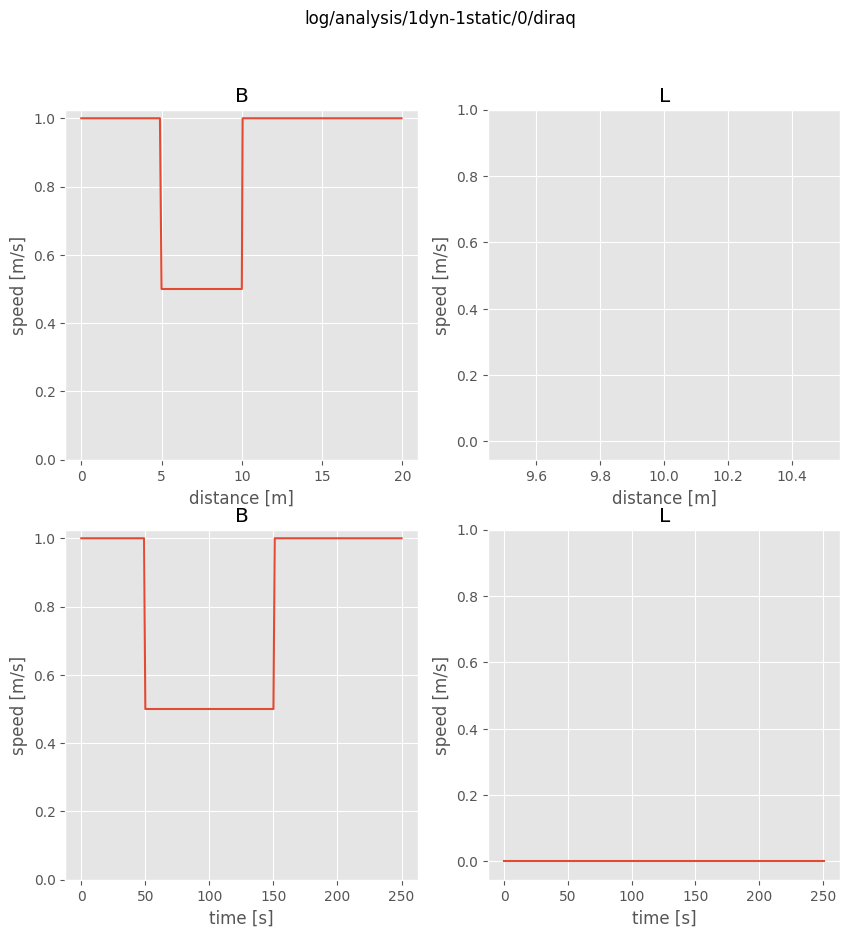

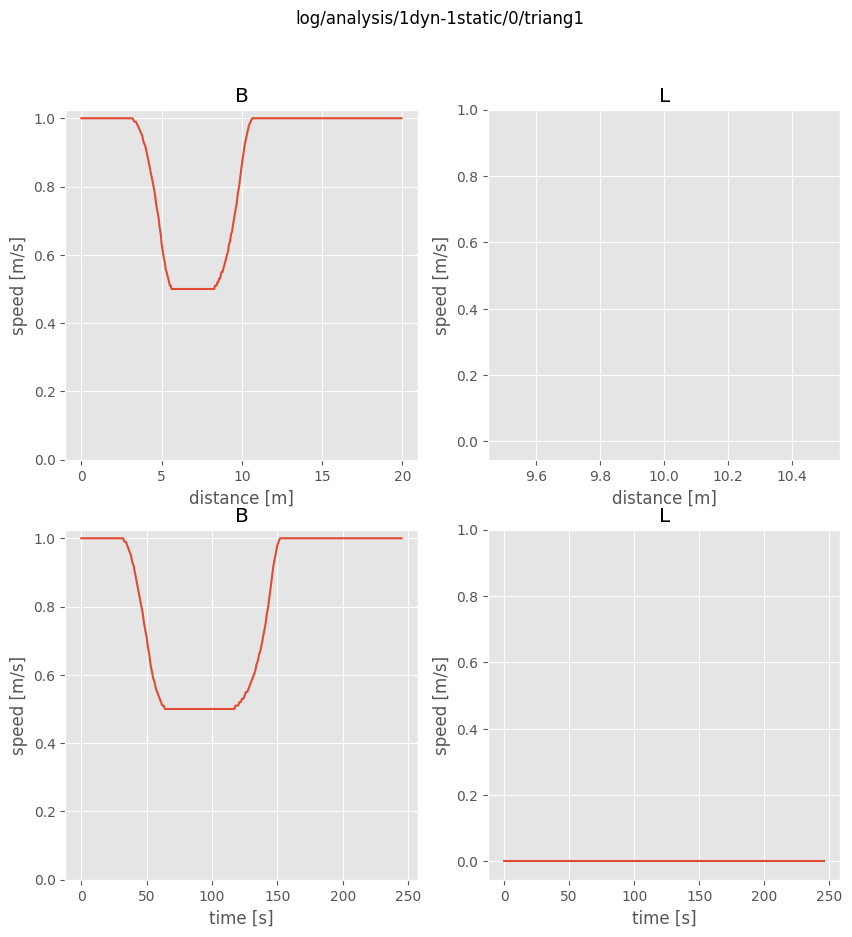

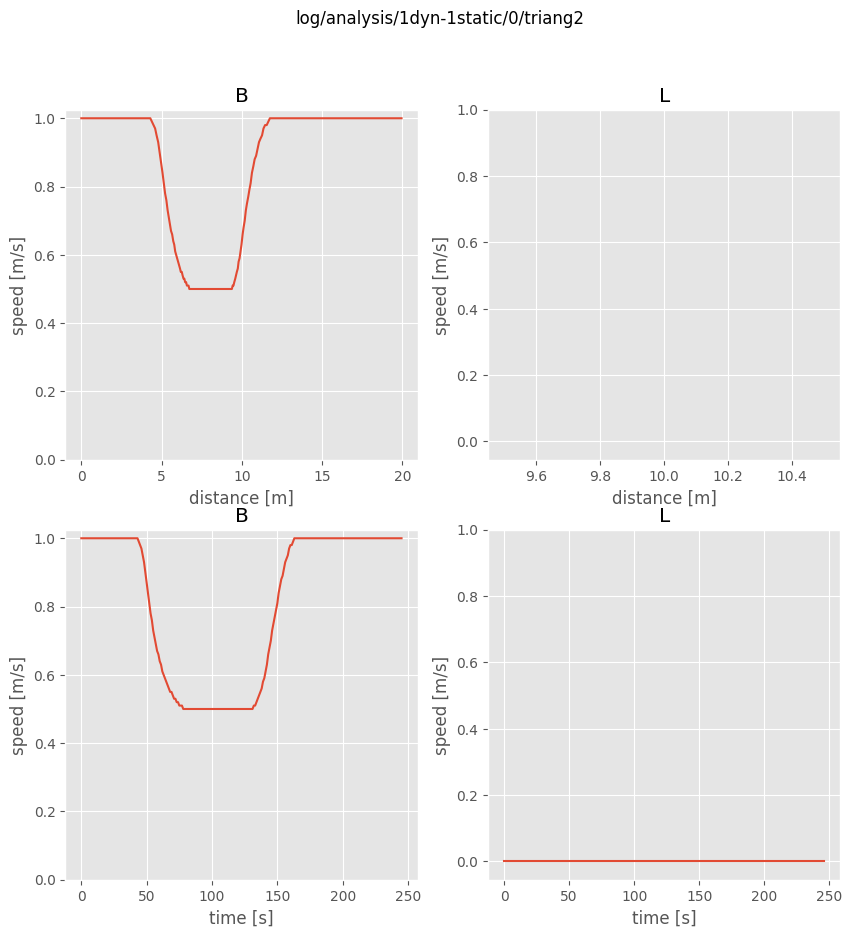

Param file [log/analysis/1static-1dyn/] : Starting 1 iterations ... |  ... Finished


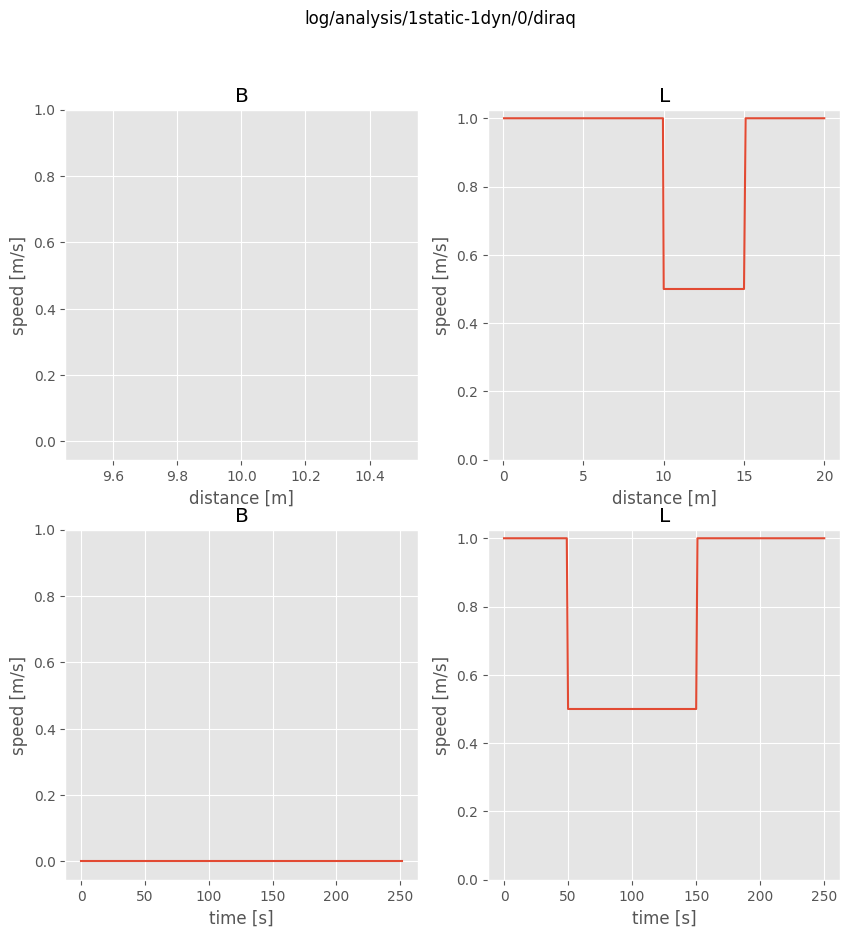

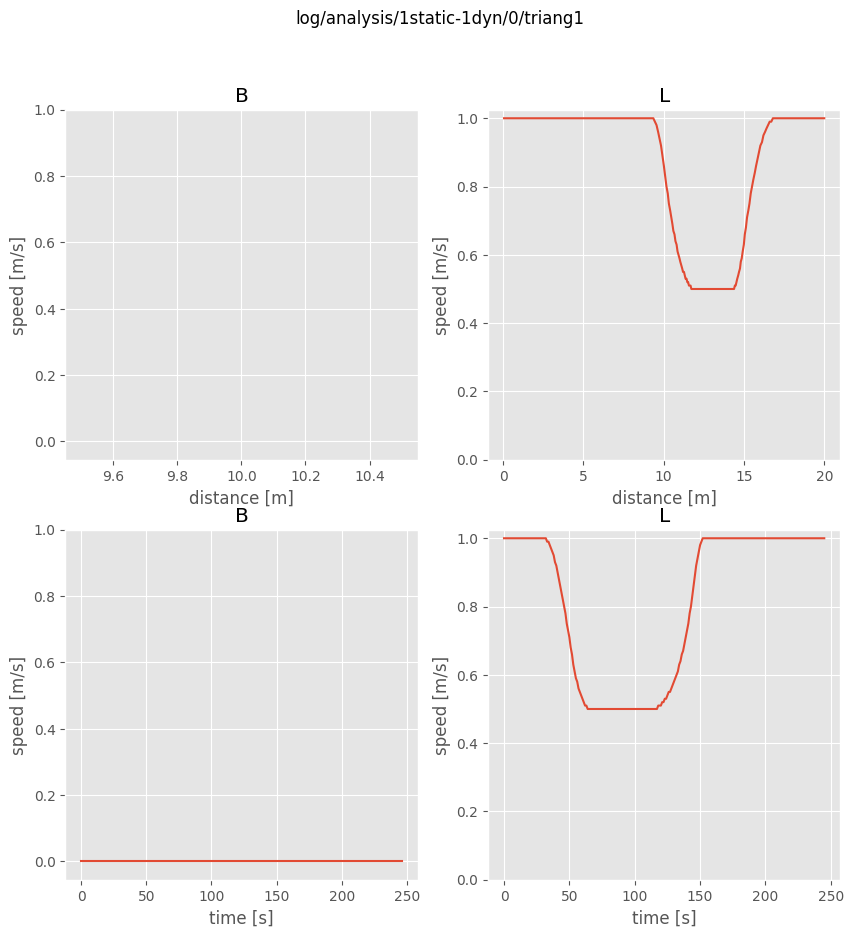

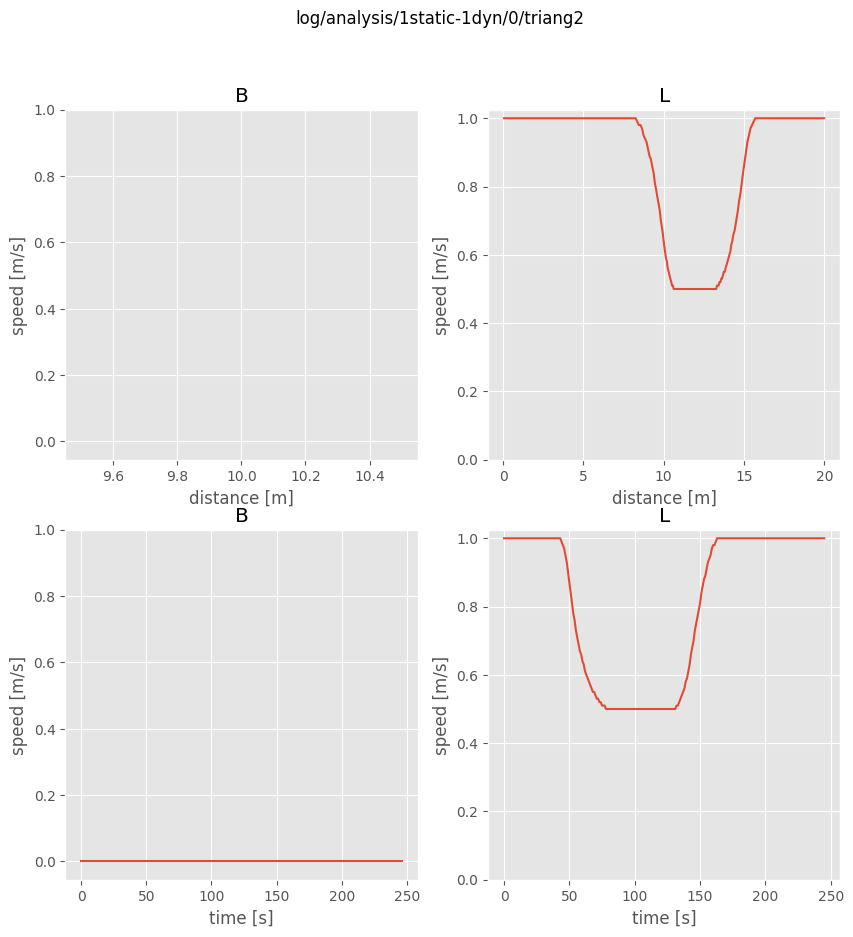

Param file [log/analysis/1dyn-1dyn/] : Starting 1 iterations ... |  ... Finished


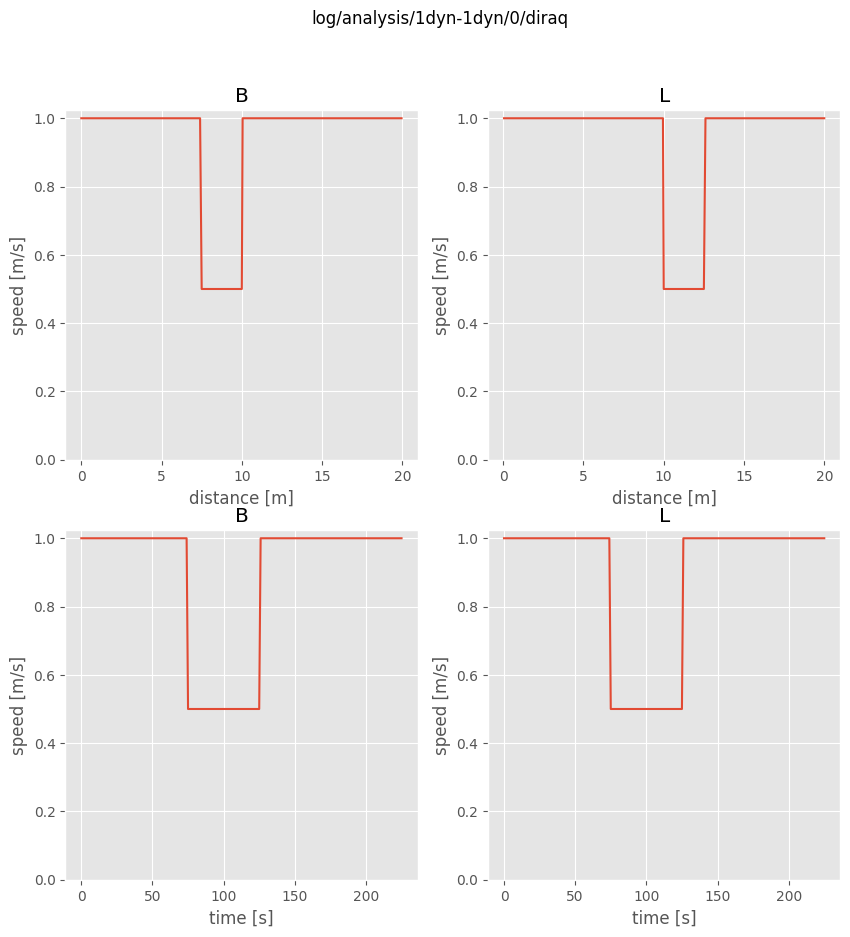

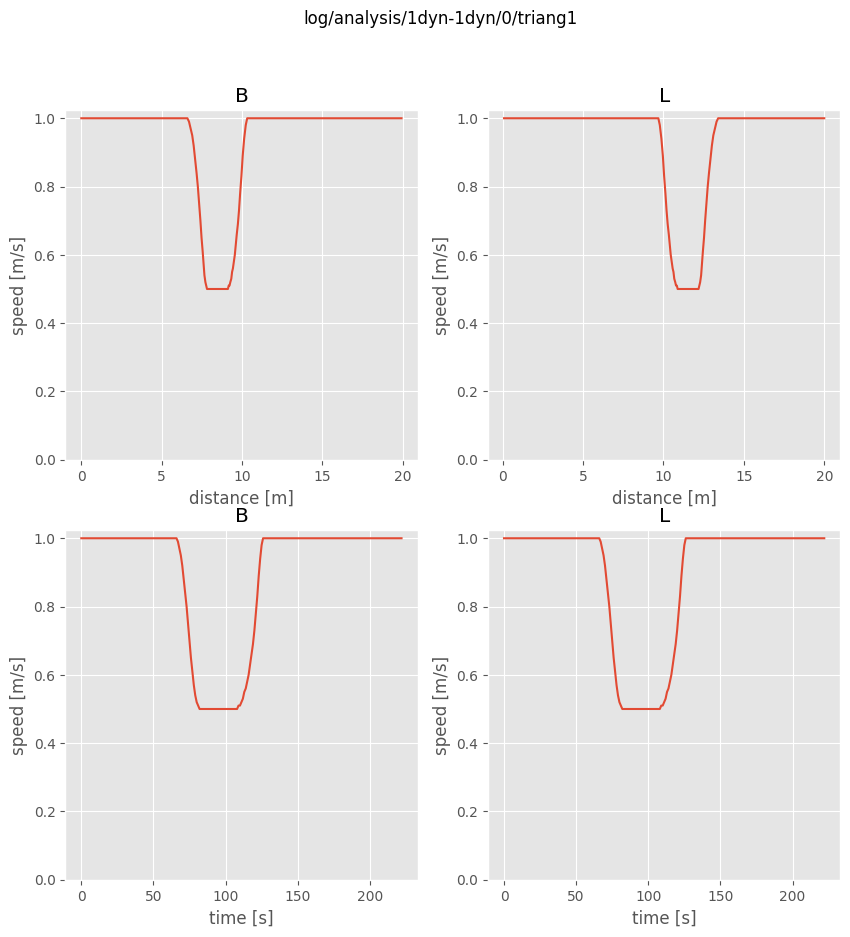

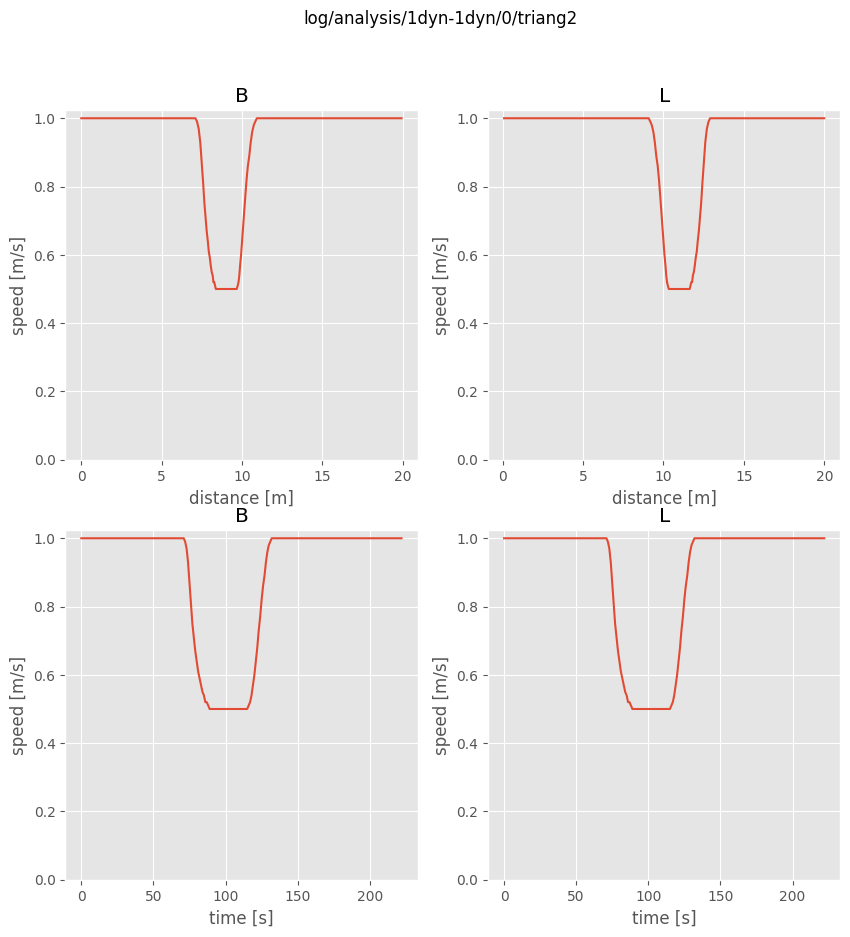

Param file [log/analysis/1dyn-1static+/] : Starting 1 iterations ... |  ... Finished


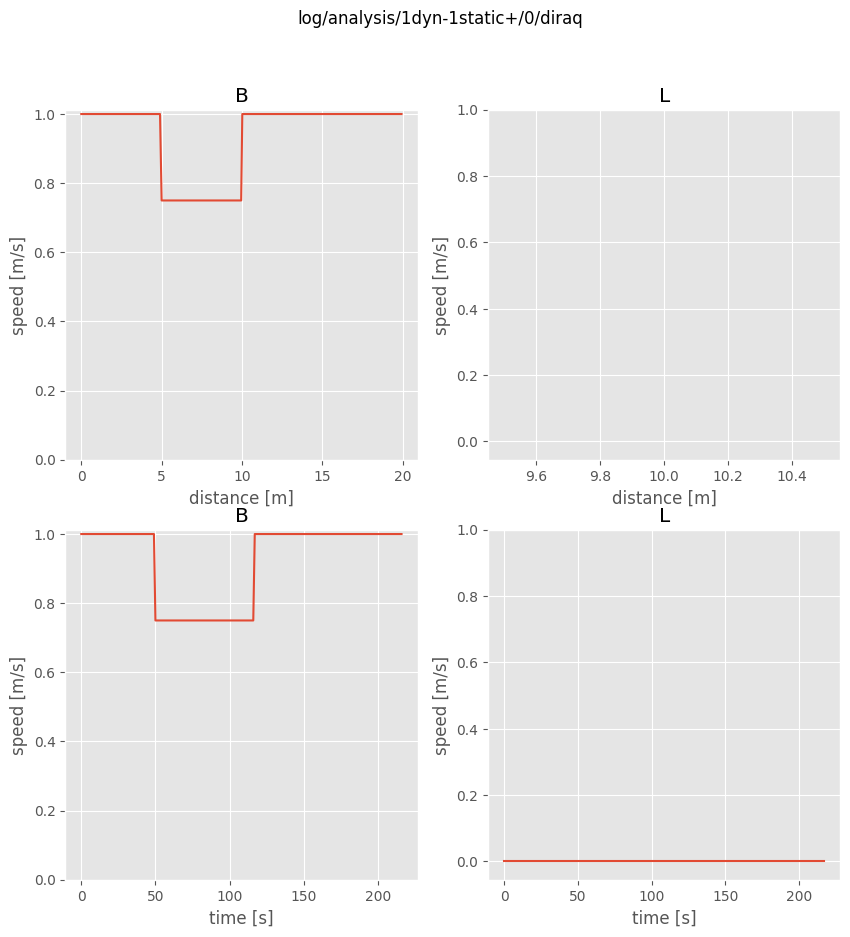

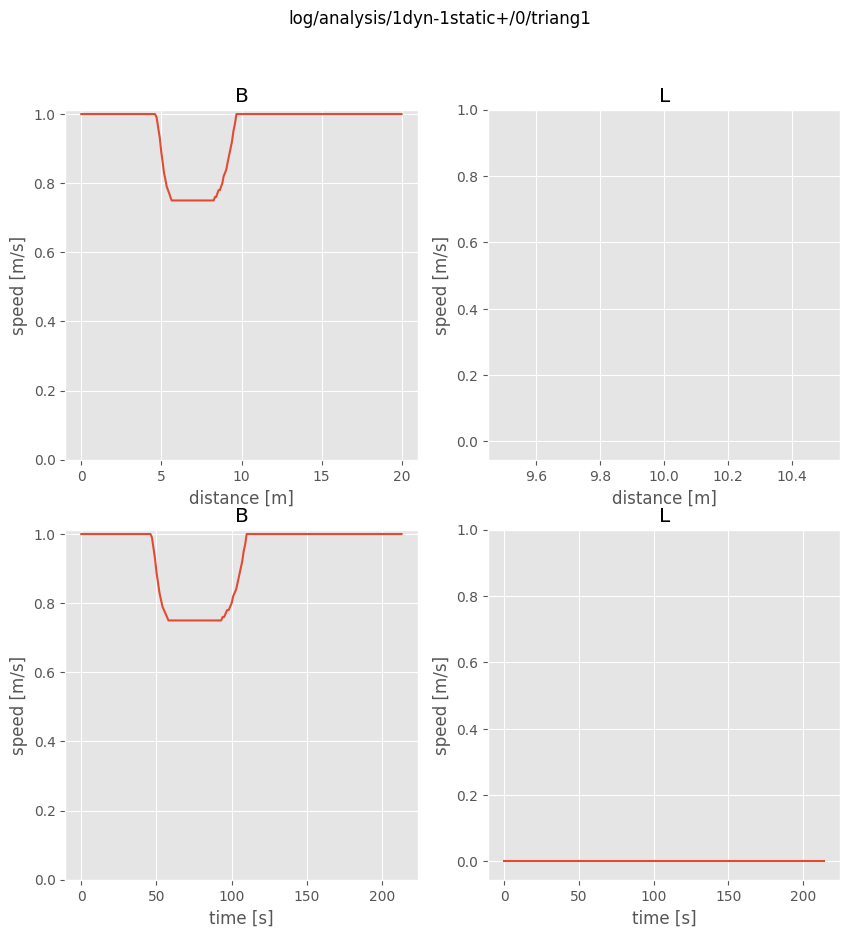

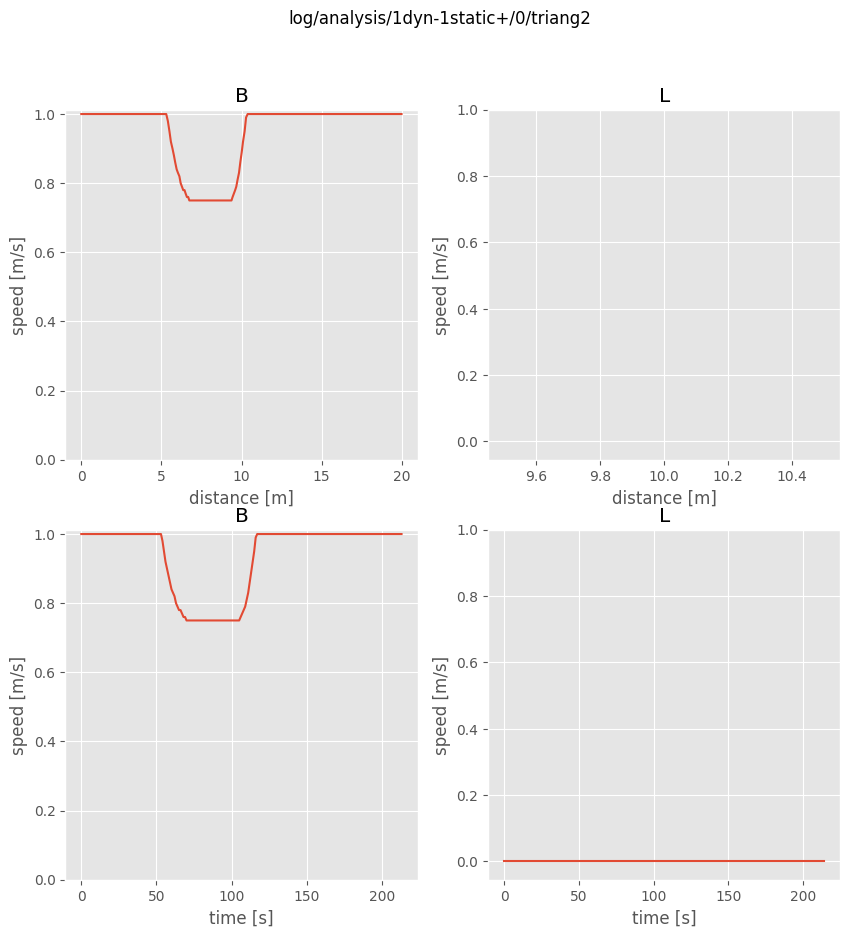

Param file [log/analysis/1static-1dyn+/] : Starting 1 iterations ... |  ... Finished


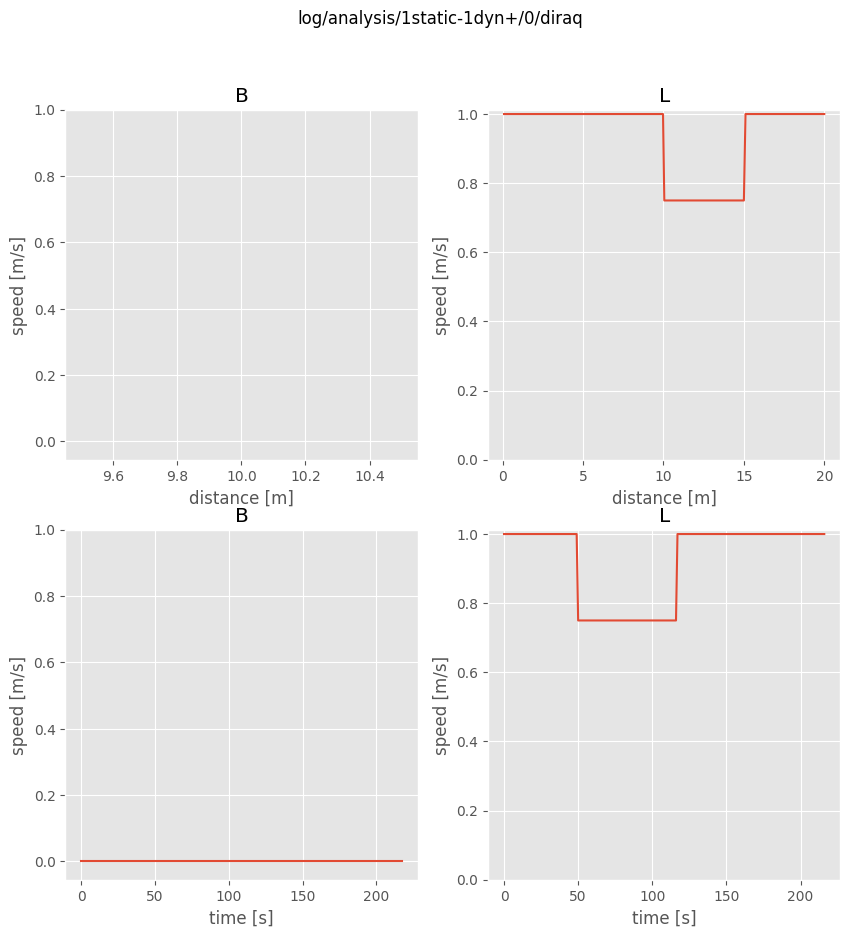

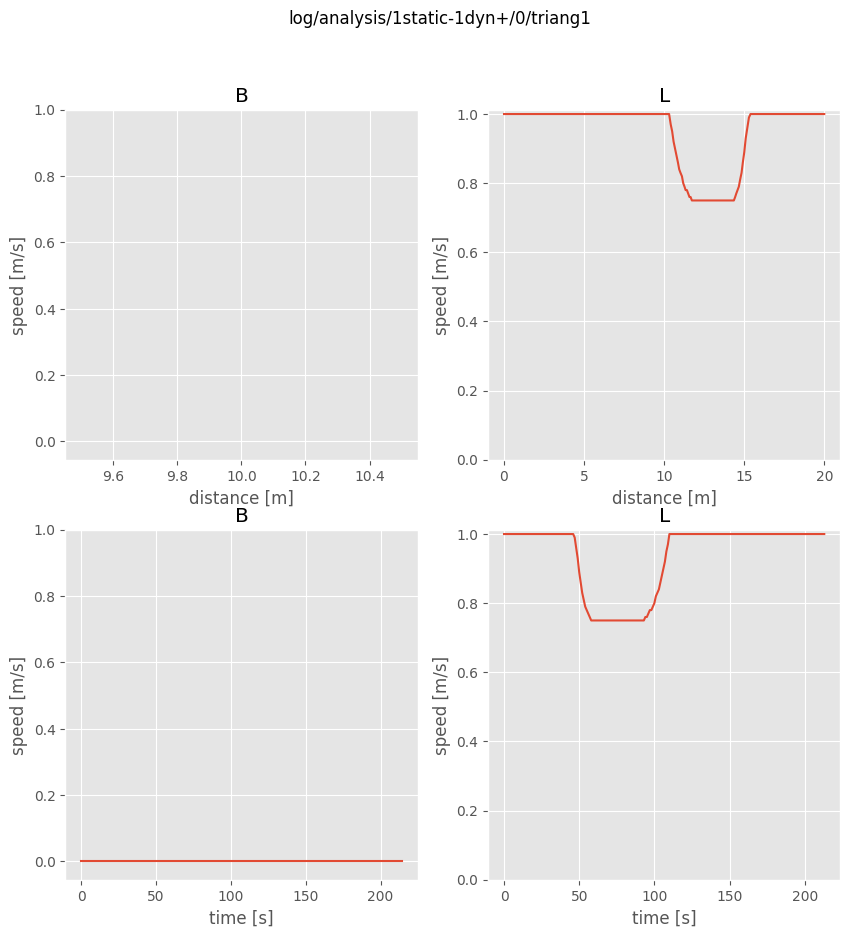

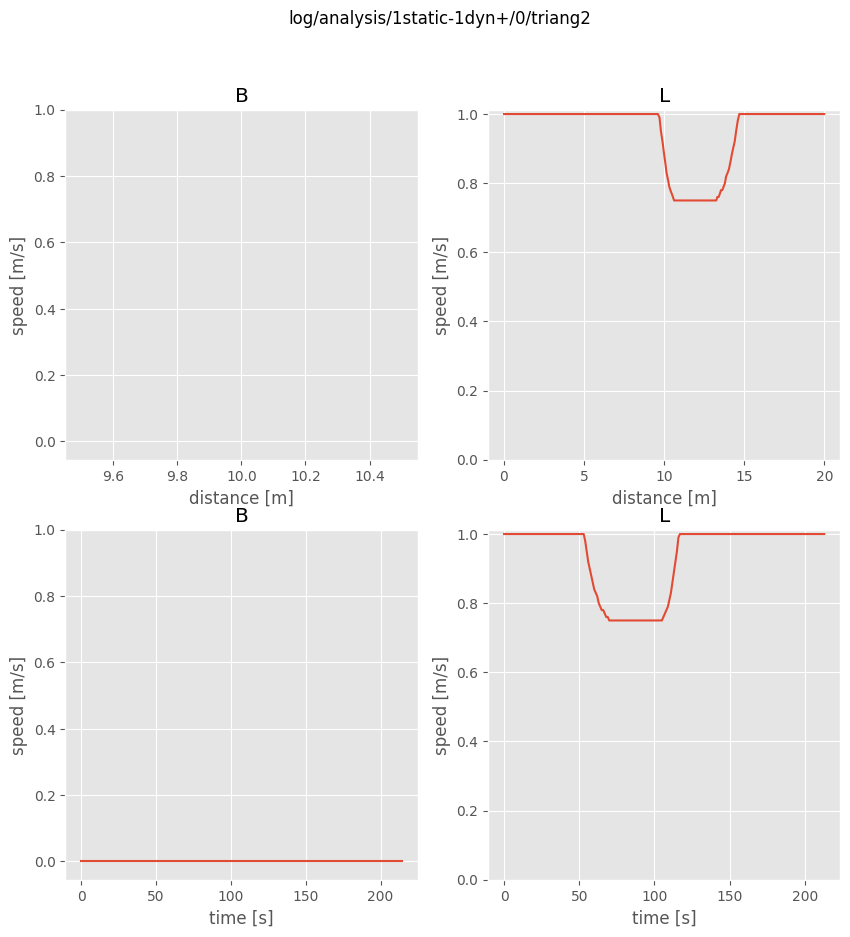

Param file [log/analysis/1dyn-1dyn+/] : Starting 1 iterations ... |  ... Finished


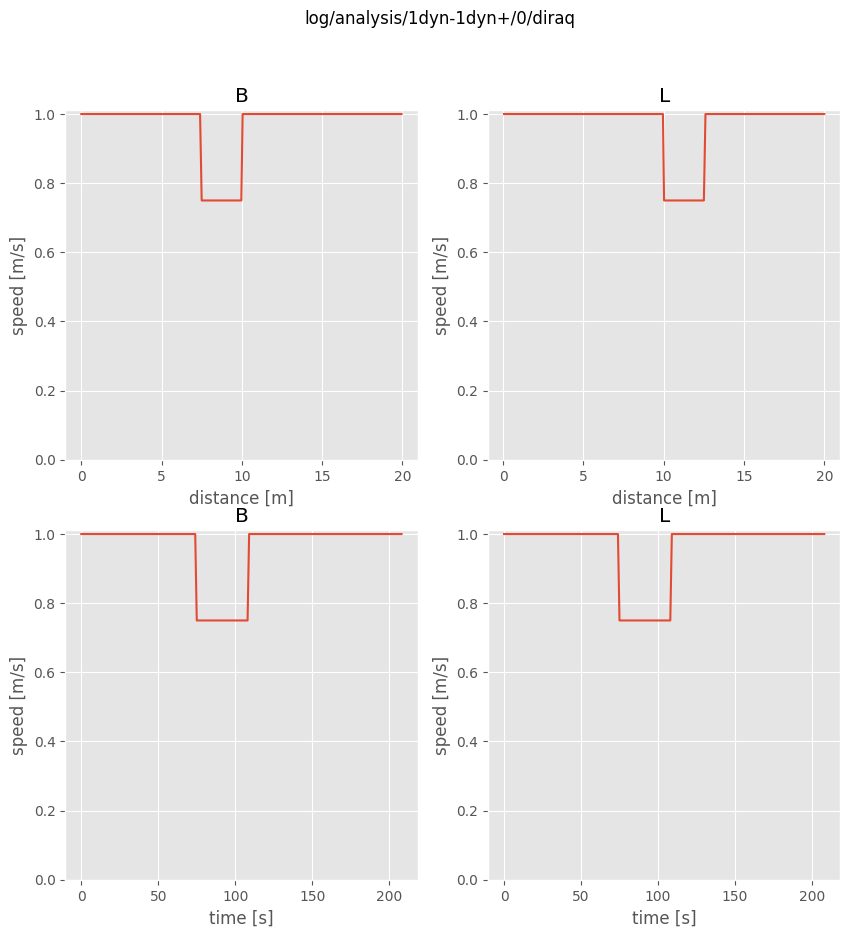

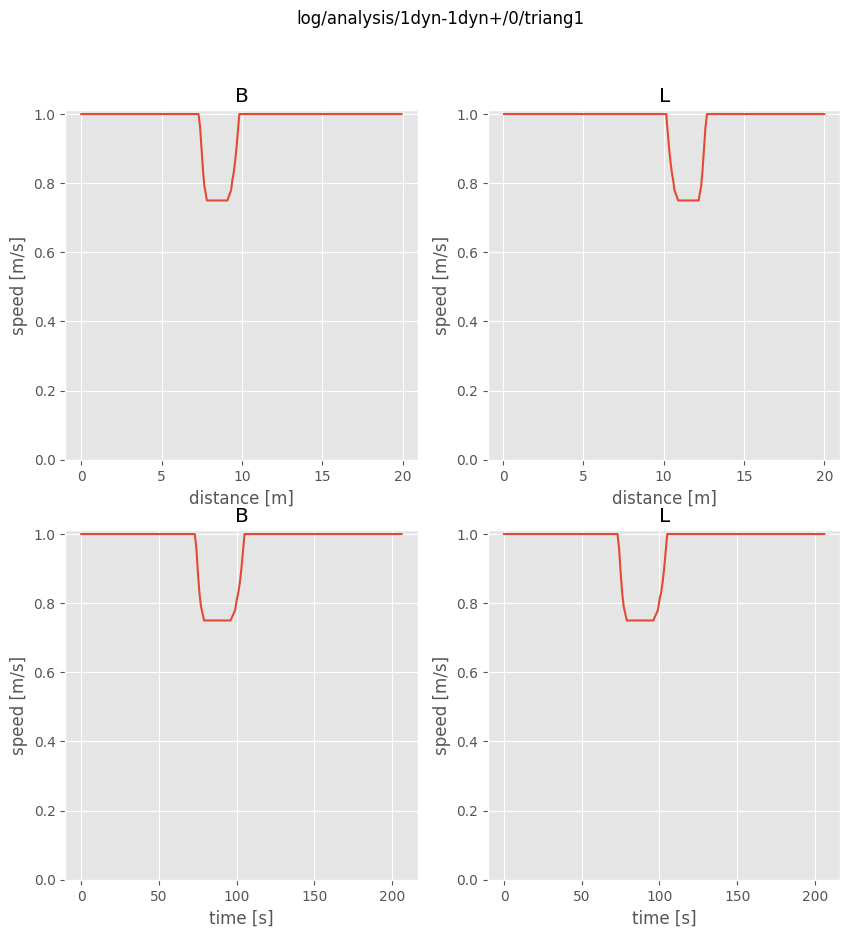

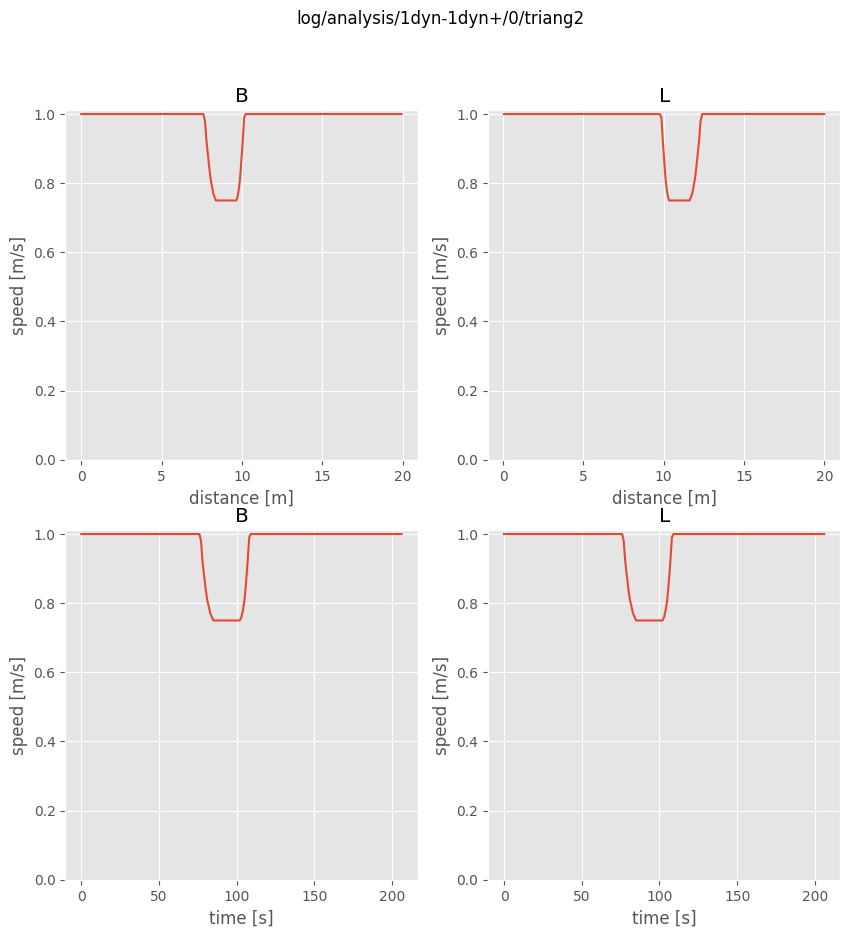

In [4]:
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '1dyn-1static',
    '1static-1dyn',
    '1dyn-1dyn',
    '1dyn-1static+', 
    '1static-1dyn+', 
    '1dyn-1dyn+', 
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
for param in params:
    process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
    process.wait()
    for kername in kernels: 
        filename = log_dir + param + '/0'
        plot1_1(f'{filename}/{kername}', * read1_1(f'{filename}/{kername}'))

# 1 za 1

In [5]:
def read11_(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 2:
                tmp1 = line[1].strip().split(',')
                tmp2 = line[2].strip().split(',')
                if int(tmp1[0]) == 1:
                    vels1.append(float(tmp1[1]))
                    pos1.append(float(tmp1[2]))
                    vels2.append(float(tmp2[1]))
                    pos2.append(float(tmp2[2]))
                else:
                    vels2.append(float(tmp1[1]))
                    pos2.append(float(tmp1[2]))
                    vels1.append(float(tmp2[1]))
                    pos1.append(float(tmp2[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [6]:
def plot11_(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(file)

    ax[0, 0].grid(True)
    ax[0, 0].plot(pos1, vels1)
    ax[0, 0].set_xlabel('distance [m]')
    ax[0, 0].set_ylabel('speed [m/s]')
    ax[0, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 0].set_title('dynamic')

    ax[0, 1].grid(True)
    ax[0, 1].plot(pos2, vels2)
    ax[0, 1].set_xlabel('distance [m]')
    ax[0, 1].set_ylabel('speed [m/s]')
    ax[0, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0, 1].set_title('dynamic')

    ax[1, 0].grid(True)
    ax[1, 0].plot(vels1)
    ax[1, 0].set_xlabel('time [s]')
    ax[1, 0].set_ylabel('speed [m/s]')
    ax[1, 0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 0].set_title('static')


    ax[1, 1].grid(True)
    ax[1, 1].plot(vels2)
    ax[1, 1].set_xlabel('time [s]')
    ax[1, 1].set_ylabel('speed [m/s]')
    ax[1, 1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1, 1].set_title('static')

    plt.show()

Param file [log/analysis/-1dyn1stat/] : Starting 1 iterations ... |  ... Finished


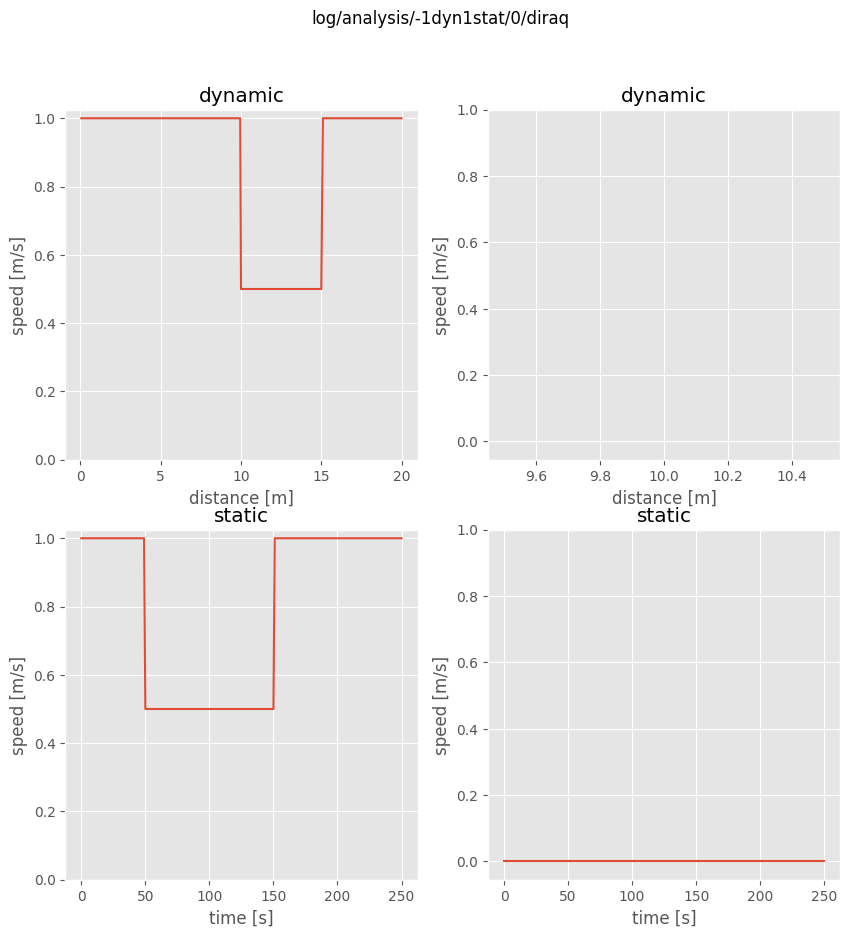

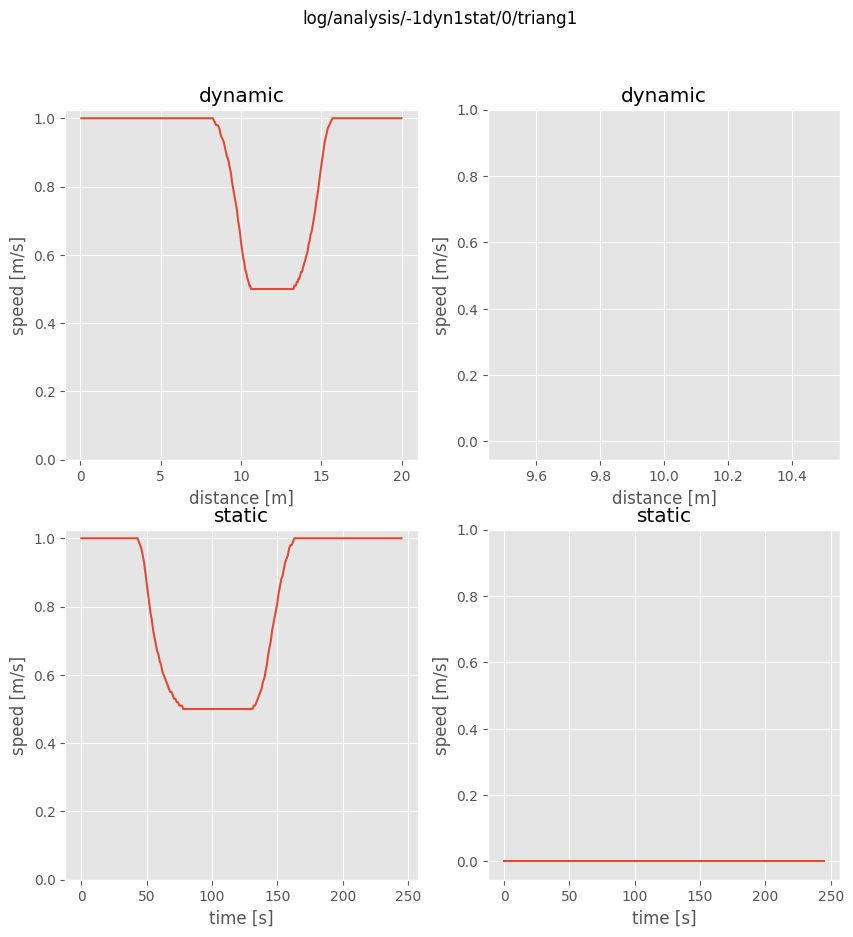

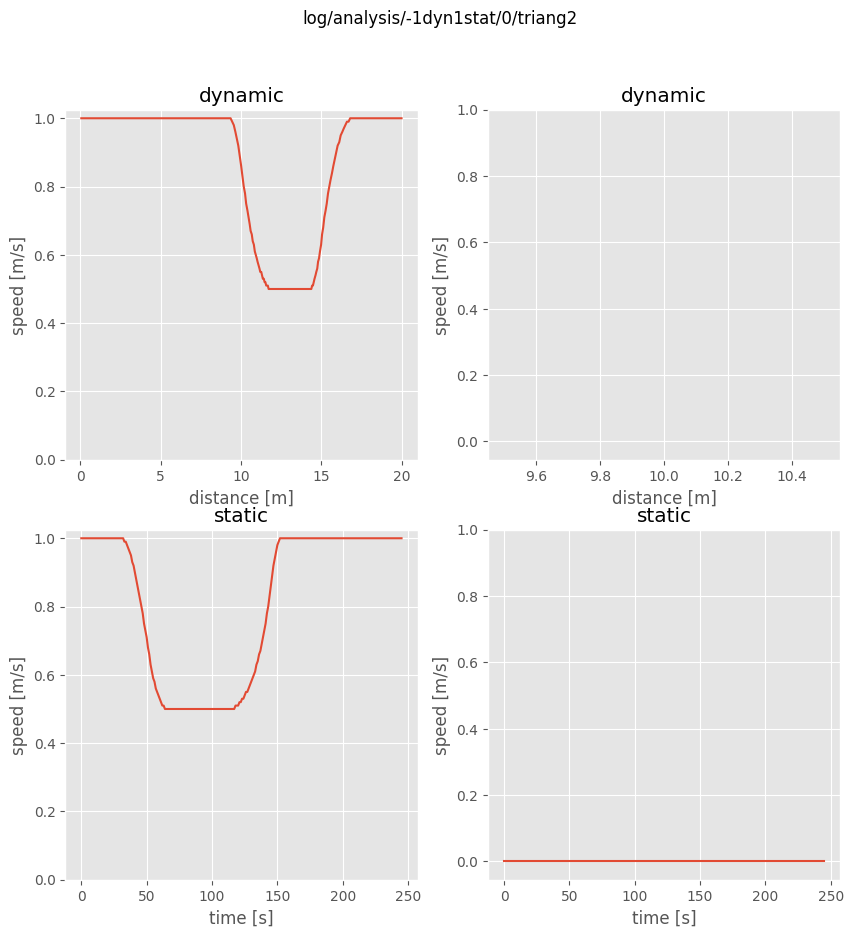

Param file [log/analysis/1dyn1stat-/] : Starting 1 iterations ... |  ... Finished


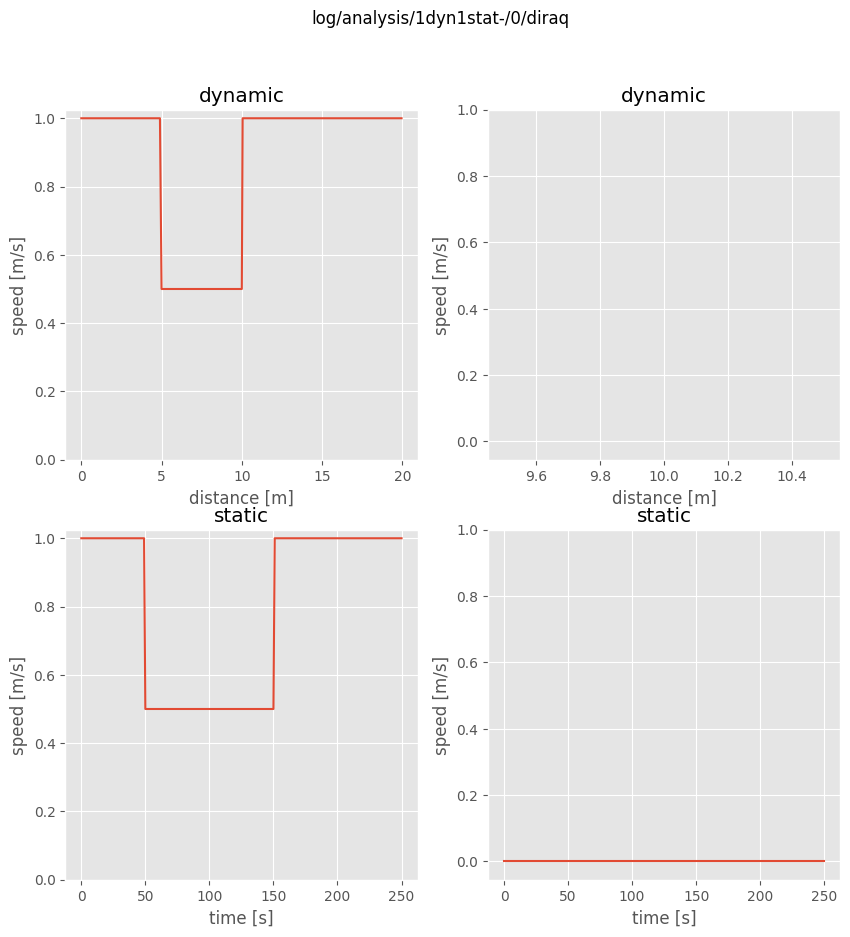

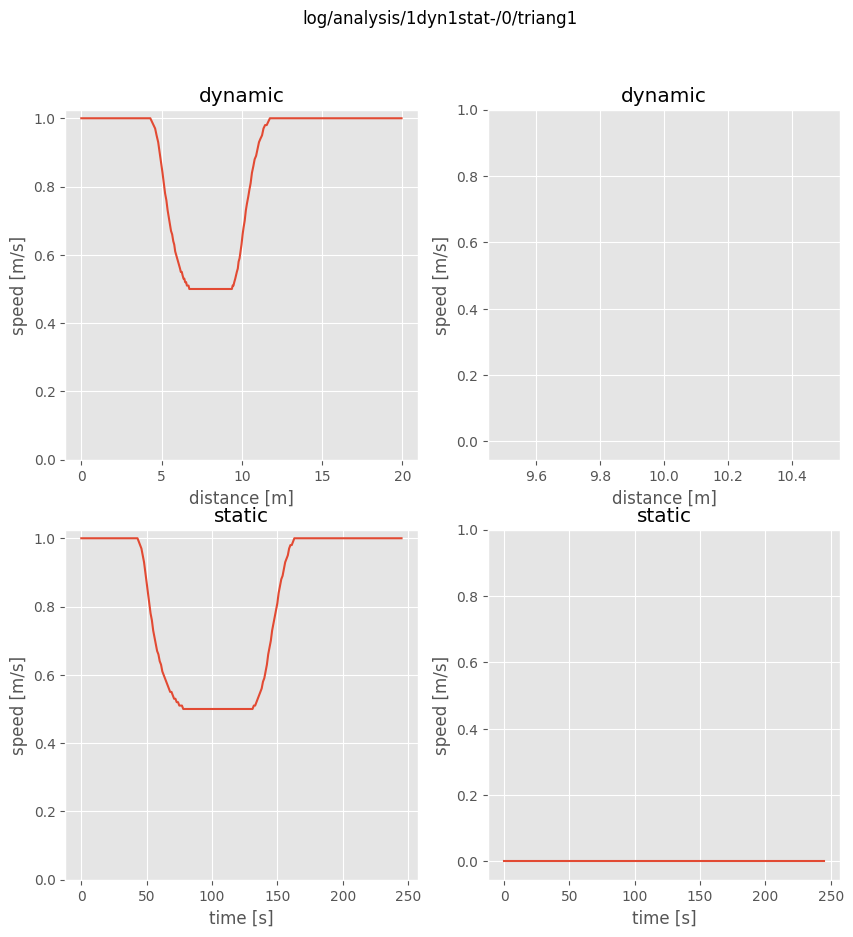

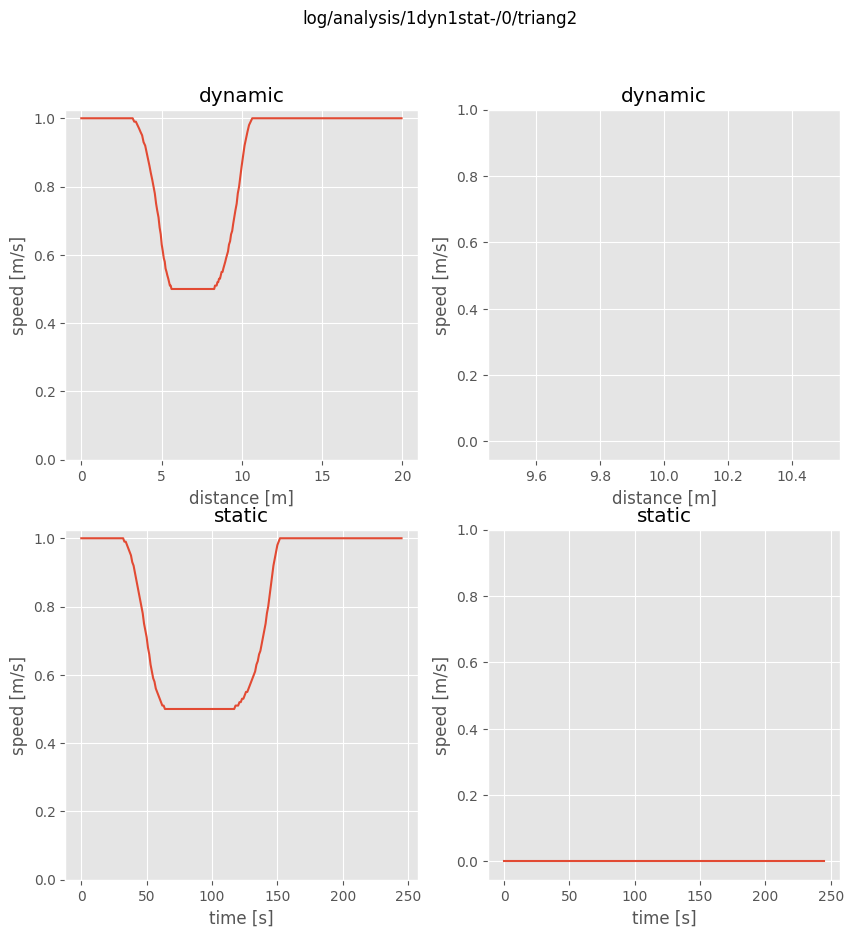

In [7]:
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '-1dyn1stat',
    '1dyn1stat-',
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
for param in params:
    process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
    process.wait()
    for kername in kernels: 
        filename = log_dir + param + '/0'
        plot11_(f'{filename}/{kername}', * read11_(f'{filename}/{kername}'))

# Vývoj počtu aktivních chodců v čase

In [12]:
def plot_transport(data_cnt: dict, data_velo: dict, ker: str, dist: float = 300, velo: float = 1.2, log: bool = False, name = "plot", save = False):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Development of macroscopic properties: {ker}")

    lams = list(float(x) for x in data_cnt.keys())

    ax[0].grid(True)
    ax[0].boxplot(list(data_cnt.values()), positions=lams)
    ax[0].set_xlabel('lambda')
    ax[0].set_ylabel('ped count')
    ax[0].set_title('Average pedestrian count')

    ax[0].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
    ax[0].set_xticklabels(list(str(x) for x in data_cnt.keys()))
    ax[0].set_xticks(lams)

    if log:
        ax[0].set_yscale('log')
    else:
        ax[0].set_ylim(0, 2000)
        # ax[0].set_ylim(0, max(max(x) for x in data_cnt.values()) + min(min(x) for x in data_cnt.values()))
    
    ax[0].plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='g', label='without interaction')
    ax[0].plot(lams, [np.median(x) for x in data_cnt.values()], marker='', linestyle='--', color='r', label='without interaction')
    

    ax[1].grid(True)
    ax[1].boxplot(list(data_velo.values()), positions=lams)
    ax[1].set_xlabel('lambda')
    ax[1].set_ylabel('speed [m/s]')
    ax[1].set_title('Average speed')
    ax[1].set_xticklabels(list(str(x) for x in data_velo.keys()))

    ax[1].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
    ax[1].set_xticklabels(list(data_velo.keys()))
    ax[1].set_xticks(lams)

    ax[1].set_ylim(0, max(max(x) for x in data_velo.values()) + 0.3)
    ax[1].axhline(velo, color='g', linestyle='--', label='without interaction')
    ax[1].plot(lams, [np.median(x) for x in data_velo.values()], marker='', linestyle='--', color='r', label='without interaction')

    if save:
        plt.savefig(f'{name}.pdf', dpi=300, bbox_inches='tight')
    plt.show

In [13]:
def read_cnt(filename, static_start, static_end, timestep):
    cnt = 0
    size = 0
    with open(filename) as f:
        for _ in range(int(static_start / timestep)): # skip non-static
            line = f.readline()
            line = f.readline()
                
        line = f.readline()
        while(line != "" and size * timestep <= static_end - static_start): # skip non-static
            cnt += int(line.strip().split()[0]) + int(f.readline().strip().split()[0])
            size += 1
            line = f.readline()

    return cnt / (size / 2)            


In [14]:
def read_velo(filename, dist, static_start, static_end, timestep):
    velo = 0
    with open(filename) as f:
        line = f.readline()
        peds = line.strip().split()

        # peds.sort(key=lambda ped: float(ped.split(',')[1]))
        # for i in range(len(peds)):
        #     if float(peds[i].split(',')[1]) > static_end: # chodci kteří nedošli (protože se zasekli) tam ale nebudou!
        #         peds = peds[:i]
        #         break

        peds.sort(key=lambda ped: float(ped.split(',')[2]))
        for i in range(len(peds)):
            if float(peds[i].split(',')[2]) >= static_start:
                peds = peds[i:]
                break

        size = len(peds)
        for ped in peds:
            times = ped.split(',')
            velo += dist / (float(times[1]) - float(times[2]))
            
        return velo / size


In [15]:
def extract_params(file):
    with open(file) as f:
        for _ in range(4):
            line = f.readline()
        velo = float(line.split()[0].strip())
        for _ in range(11):
            line = f.readline()
        dist = float(line.split()[0].strip())
        for _ in range(5):
            line = f.readline()
        lam = float(line.split()[0].strip())
        return dist, lam, velo


In [16]:
def read_static(file):
    with open(file) as f:
        peds = f.readline().strip().split()
        B_start = min(float(ped.split(',')[1]) for ped in peds if float(ped.split(',')[0]) > 0)
        L_start = min(float(ped.split(',')[1]) for ped in peds if float(ped.split(',')[0]) < 0)
        start = max(B_start, L_start)

        B_end = max(float(ped.split(',')[2]) for ped in peds if float(ped.split(',')[0]) > 0)
        L_end = max(float(ped.split(',')[2]) for ped in peds if float(ped.split(',')[0]) < 0)
        end = min(B_end, L_end)
        return start, end   


In [19]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
param_type = "hetero-hetero"
log_dir = f'../log/{param_type}/'
iter_cnt = 10
timestep = 0.1
run = False
params = [
    f'{param_type}1'
    ,f'{param_type}2'
    ,f'{param_type}3'
    ,f'{param_type}4'
    ,f'{param_type}5'
    ,f'{param_type}6'
    ,f'{param_type}7'
    ,f'{param_type}8'
    ]
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    ,"free"
]
# keys are kernels
data_cnt = dict()
data_velo = dict()

# keys are lambdas
for ker in kernels:
    data_cnt[ker] = dict()
    data_velo[ker] = dict()

for param in params[:]:
    if run == True:
        process = subprocess.Popen([ sim_file, str(iter_cnt), param_dir + param ])
        process.wait()
    dist, lam, velo = extract_params(param_dir + param)
    for kername in kernels[:]:
        data_cnt[kername][lam] = list()
        data_velo[kername][lam] = list()
        for it in range(iter_cnt):
            dir = log_dir + param + f'/{str(it)}/'
            file_cnt = f'{dir}{kername}{file_type_cnt}'
            file_velo = f'{dir}{kername}{file_type_velo}'

            static_start, static_end = read_static(file_velo)

            data_cnt[kername][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
            data_velo[kername][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))
            

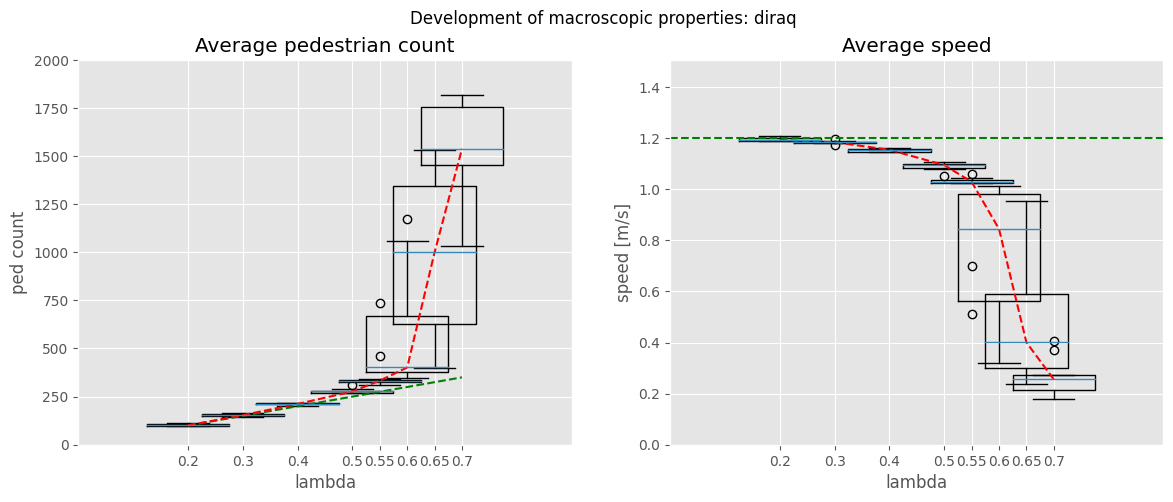

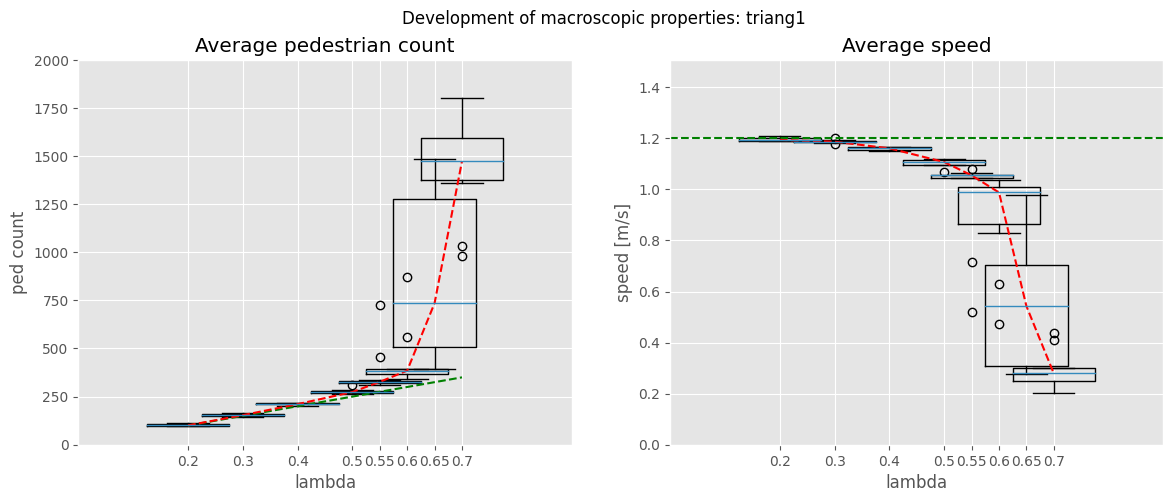

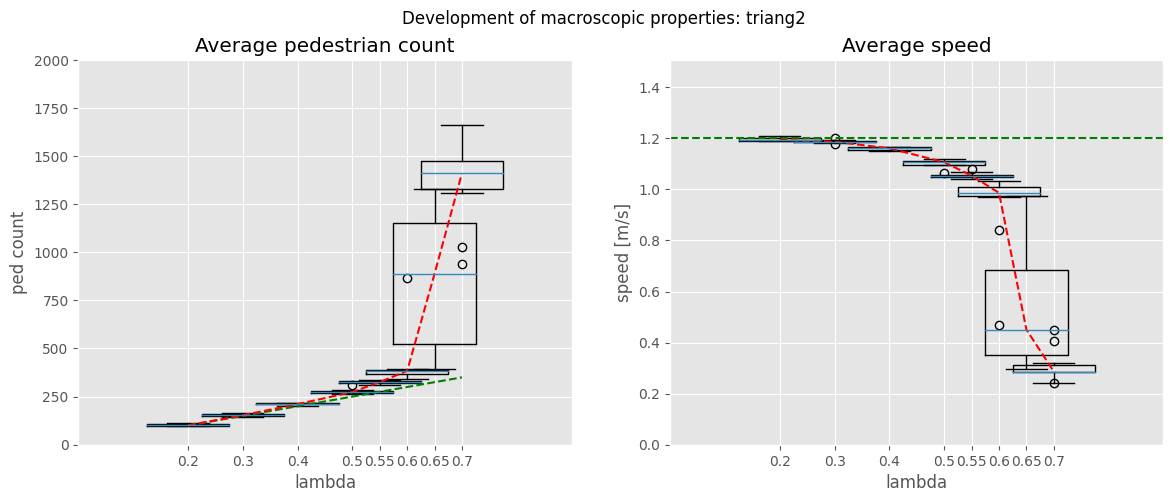

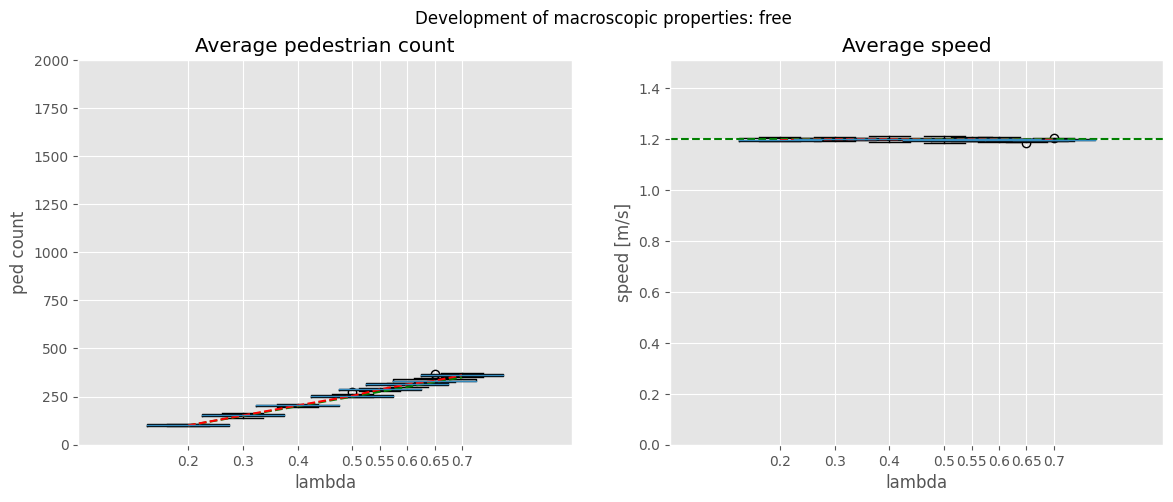

In [20]:
for ker in kernels:
    plot_transport(data_cnt[ker], data_velo[ker], ker, dist, velo, False, f'../results/{param_type}_{ker}', False)


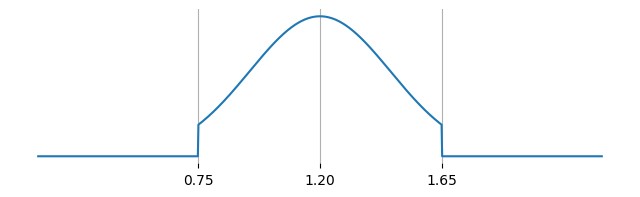

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define parameters
mu = 1.2  # Mean
sigma = 0.26  # Standard deviation
trim = 0.45  # Trimming value on each side

# Define the range for trimming
lower_bound = mu - trim
upper_bound = mu + trim

# Generate data points for the normal distribution
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

# Trim the distribution
trimmed_pdf_values = np.where((x >= lower_bound) & (x <= upper_bound), pdf_values, 0)

# Normalize the PDF values
normalization_factor = np.trapz(trimmed_pdf_values, x)
trimmed_pdf_values /= normalization_factor

# Plotting
plt.figure(figsize=(8, 2))
plt.plot(x, trimmed_pdf_values, label='Trimmed Normal Distribution (Normalized)')
plt.grid(True)
plt.xticks([0.75, 1.2, 1.65])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("speed_distribution.pdf")


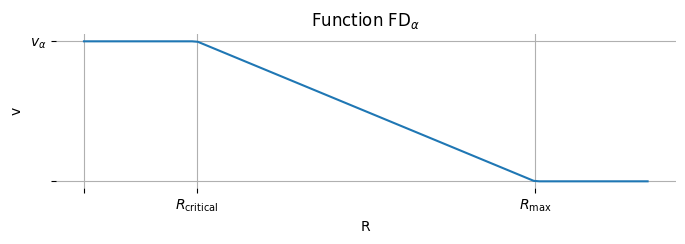

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def FD_alpha(R, v_alpha, R_max, R_critical):
    if R < R_critical:
        return v_alpha
    elif R_critical <= R < R_max:
        return v_alpha * (1 - (R - R_critical) / (R_max - R_critical))
    else:
        return 0

# Define the parameters
v_alpha = 10
R_max = 20
R_critical = 5

# Generate some sample data
R_values = np.linspace(0, R_max + 5, 100)
FD_values = [FD_alpha(R, v_alpha, R_max, R_critical) for R in R_values]

# Plot the function
plt.figure(figsize=(8, 2))
plt.plot(R_values, FD_values, label=r'$\mathrm{FD}_\alpha(R; v_\alpha,R_{\mathrm{max}}, R_{\mathrm{critical}})$')
plt.xlabel('R')
plt.ylabel('v')
plt.title(r'Function FD$_\alpha$')

plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks([0, 5, 20], ["", r'$R_{\mathrm{critical}}$', r'$R_{\mathrm{max}}$'])
plt.yticks([0, 10], ["", r'$v_\alpha$'])

plt.savefig("fd-transport.pdf")


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

plt.style.use('ggplot')

In [2]:
def read1_1(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels1.append(float(tmp[1]))
                    pos1.append(float(tmp[2]))

            line = file.readline().strip().split()
            if len(line) > 1:
                tmp = line[1].strip().split(',')
                if len(tmp) > 1:
                    vels2.append(float(tmp[1]))
                    pos2.append(float(tmp[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [3]:
def read11_(filename):
    with open(f'{filename}.transportB') as file:
        vels1 = []
        pos1 = []
        vels2 = []
        pos2 = []
        line = file.readline()
        while line != '':
            line = line.strip().split()
            if len(line) > 2:
                tmp1 = line[1].strip().split(',')
                tmp2 = line[2].strip().split(',')
                if int(tmp1[0]) == 1:
                    vels1.append(float(tmp1[1]))
                    pos1.append(float(tmp1[2]))
                    vels2.append(float(tmp2[1]))
                    pos2.append(float(tmp2[2]))
                else:
                    vels2.append(float(tmp1[1]))
                    pos2.append(float(tmp1[2]))
                    vels1.append(float(tmp2[1]))
                    pos1.append(float(tmp2[2]))

            line = file.readline()
            
        return vels1, pos1, vels2, pos2

In [4]:
def plot1_1(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle(file)

    ax[0].grid(True)
    ax[0].plot(pos1, vels1)
    ax[0].set_xlabel('distance [m]')
    ax[0].set_ylabel('speed [m/s]')
    ax[0].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[0].set_title('B')

    ax[1].grid(True)
    ax[1].plot(pos2, vels2)
    ax[1].set_xlabel('distance [m]')
    ax[1].set_ylabel('speed [m/s]')
    ax[1].set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    ax[1].set_title('L')

    plt.show()

In [5]:
def plot_all(data, kernel):
    fig, ax = plt.subplots(3, 2, figsize=(13, 17))
    # fig.suptitle(f'Experiments With {kernel.capitalize()} Kernel, R_crit = 0', size=20)
    
    for i, traj in enumerate(data[kernel]):
        if i == 0:
            ax[0, 0].grid(True)
            ax[0, 0].plot(traj[1], traj[0])
            ax[0, 0].set_xlabel('distance [m]')
            ax[0, 0].set_ylabel('speed [m/s]')
            ax[0, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 0].set_title('B-type moving, L-type static')
            
        if i == 1:
            ax[0, 1].grid(True)
            ax[0, 1].plot(traj[3], traj[2])
            ax[0, 1].set_xlabel('distance [m]')
            ax[0, 1].set_ylabel('speed [m/s]')
            ax[0, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 1].set_title('L-type moving, B-type static')

        if i == 2:
            ax[1, 0].grid(True)
            ax[1, 0].plot(traj[1], traj[0])
            ax[1, 0].set_xlabel('distance [m]')
            ax[1, 0].set_ylabel('speed [m/s]')
            ax[1, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 0].set_title('B-type moving, B-type static')
            
        if i == 3:
            ax[1, 1].grid(True)
            ax[1, 1].plot(traj[1], traj[0])
            ax[1, 1].set_xlabel('distance [m]')
            ax[1, 1].set_ylabel('speed [m/s]')
            ax[1, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 1].set_title('L-type moving, L-type static')

        if i == 4:
            ax[2, 0].grid(True)
            ax[2, 0].plot(traj[1], traj[0])
            ax[2, 0].set_xlabel('distance [m]')
            ax[2, 0].set_ylabel('speed [m/s]')
            ax[2, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[2, 0].set_title('B-type moving towards moving L-type')

            ax[2, 1].grid(True)
            ax[2, 1].plot(traj[3], traj[2])
            ax[2, 1].set_xlabel('distance [m]')
            ax[2, 1].set_ylabel('speed [m/s]')
            ax[2, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[2, 1].set_title('L-type moving towards moving B-type')

    plt.savefig(f"{kernel}-1-1tests.pdf")
    plt.show()

In [6]:
def plot_all_(data, kernel):
    fig, ax = plt.subplots(2, 2, figsize=(13, 12))
    # fig.suptitle(f'Experiments With {kernel.capitalize()} Kernel, R_crit = 0.5', size=20)
    
    for i, traj in enumerate(data[kernel][5:]):
        if i == 0:
            ax[0, 0].grid(True)
            ax[0, 0].plot(traj[1], traj[0])
            ax[0, 0].set_xlabel('distance [m]')
            ax[0, 0].set_ylabel('speed [m/s]')
            ax[0, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 0].set_title('B-type moving, L-type static')
            
        if i == 1:
            ax[0, 1].grid(True)
            ax[0, 1].plot(traj[3], traj[2])
            ax[0, 1].set_xlabel('distance [m]')
            ax[0, 1].set_ylabel('speed [m/s]')
            ax[0, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[0, 1].set_title('L-type moving, B-type static')


        if i == 2:
            ax[1, 0].grid(True)
            ax[1, 0].plot(traj[1], traj[0])
            ax[1, 0].set_xlabel('distance [m]')
            ax[1, 0].set_ylabel('speed [m/s]')
            ax[1, 0].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 0].set_title('B-type moving towards moving L-type')

            ax[1, 1].grid(True)
            ax[1, 1].plot(traj[3], traj[2])
            ax[1, 1].set_xlabel('distance [m]')
            ax[1, 1].set_ylabel('speed [m/s]')
            ax[1, 1].set_yticks([x for x in np.arange(0, 1.2, 0.2)])
            ax[1, 1].set_title('L-type moving towards moving B-type')

    plt.savefig(f"{kernel}-1-1tests+.pdf")
    plt.show()

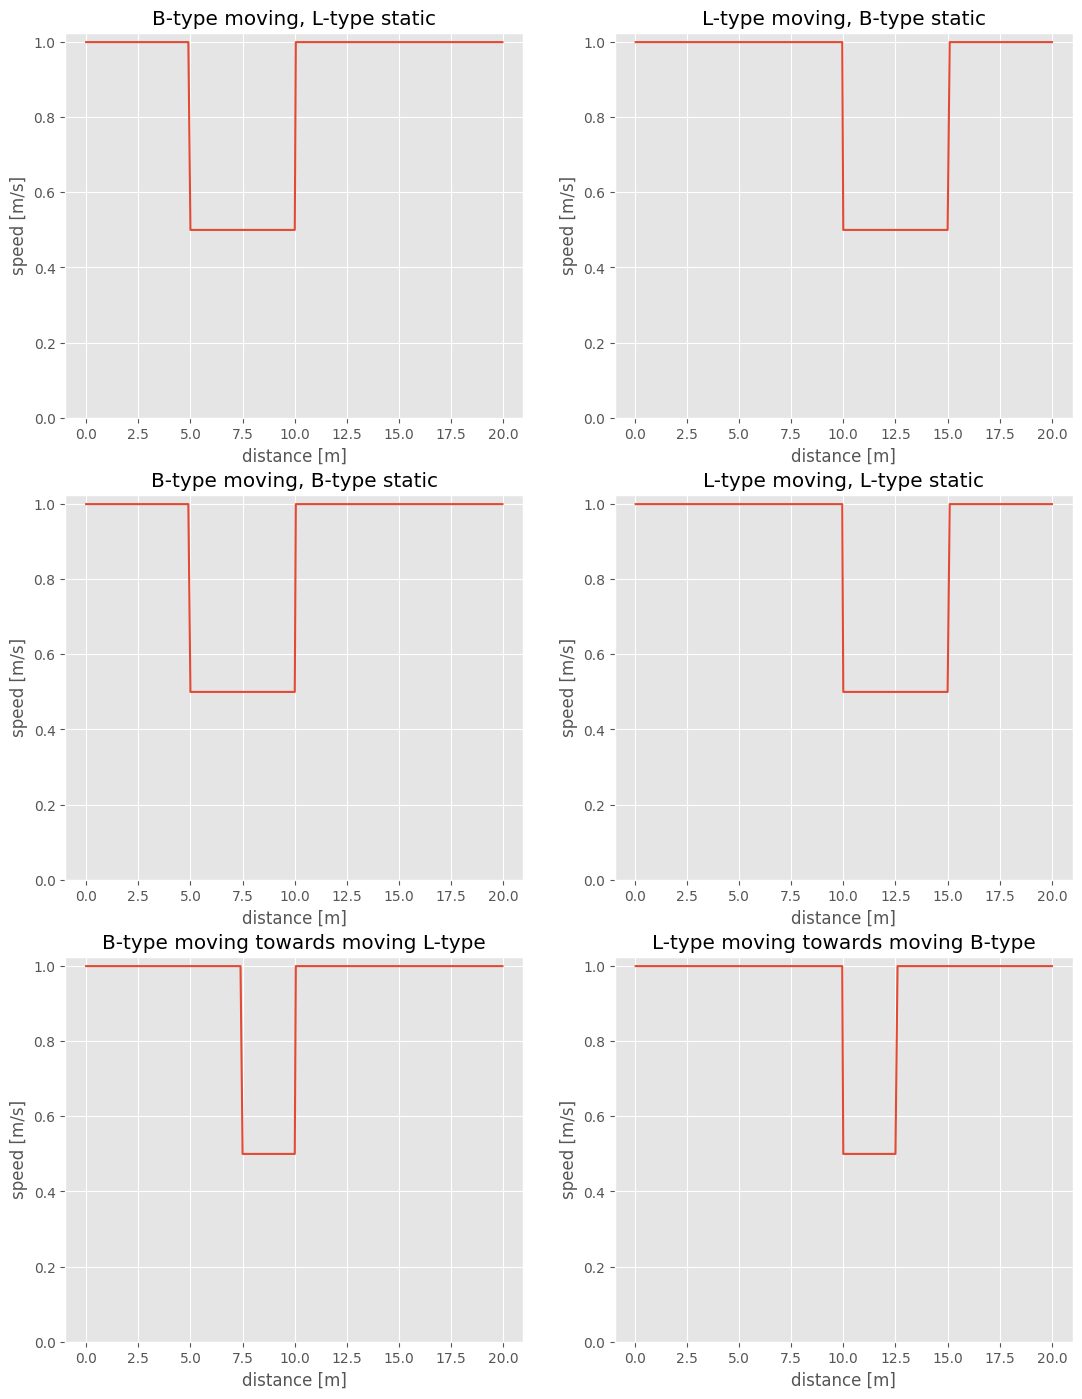

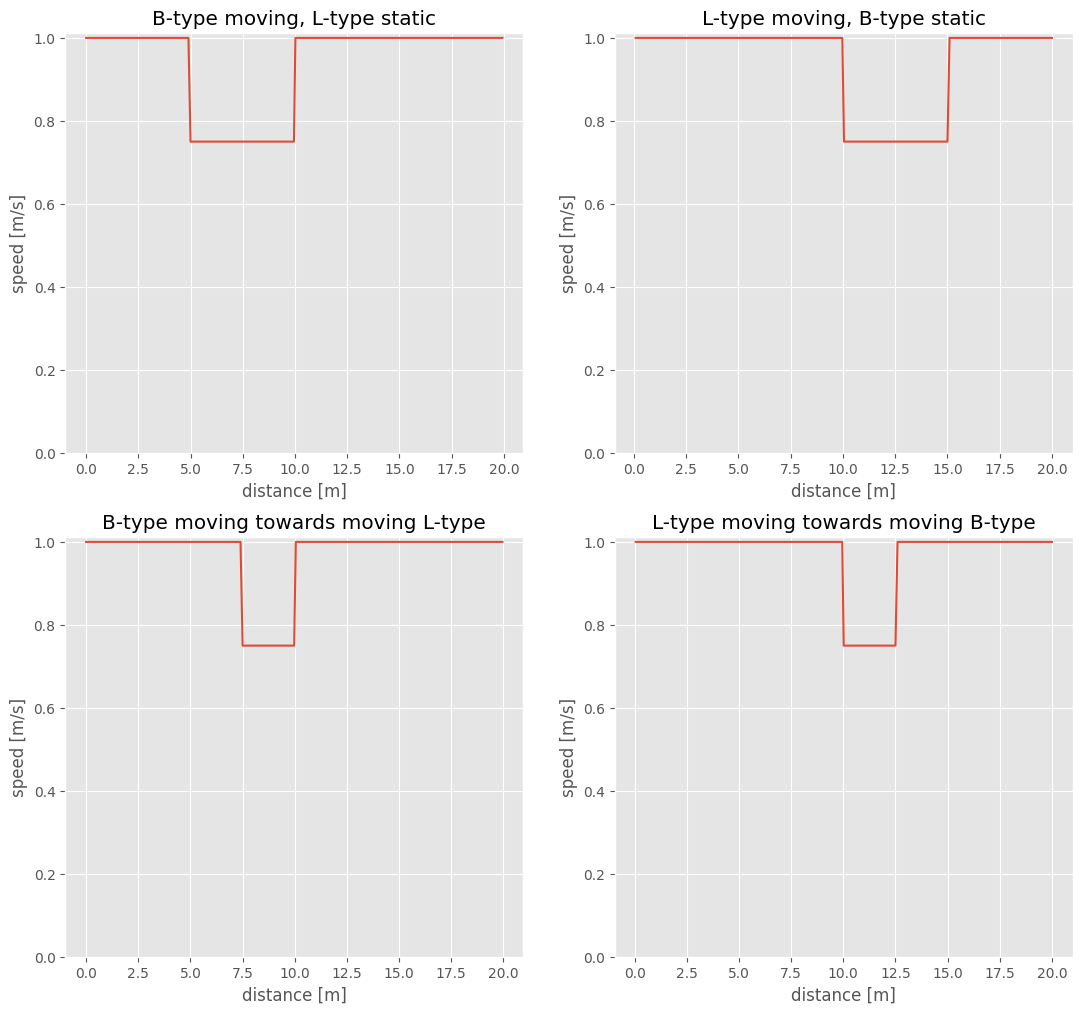

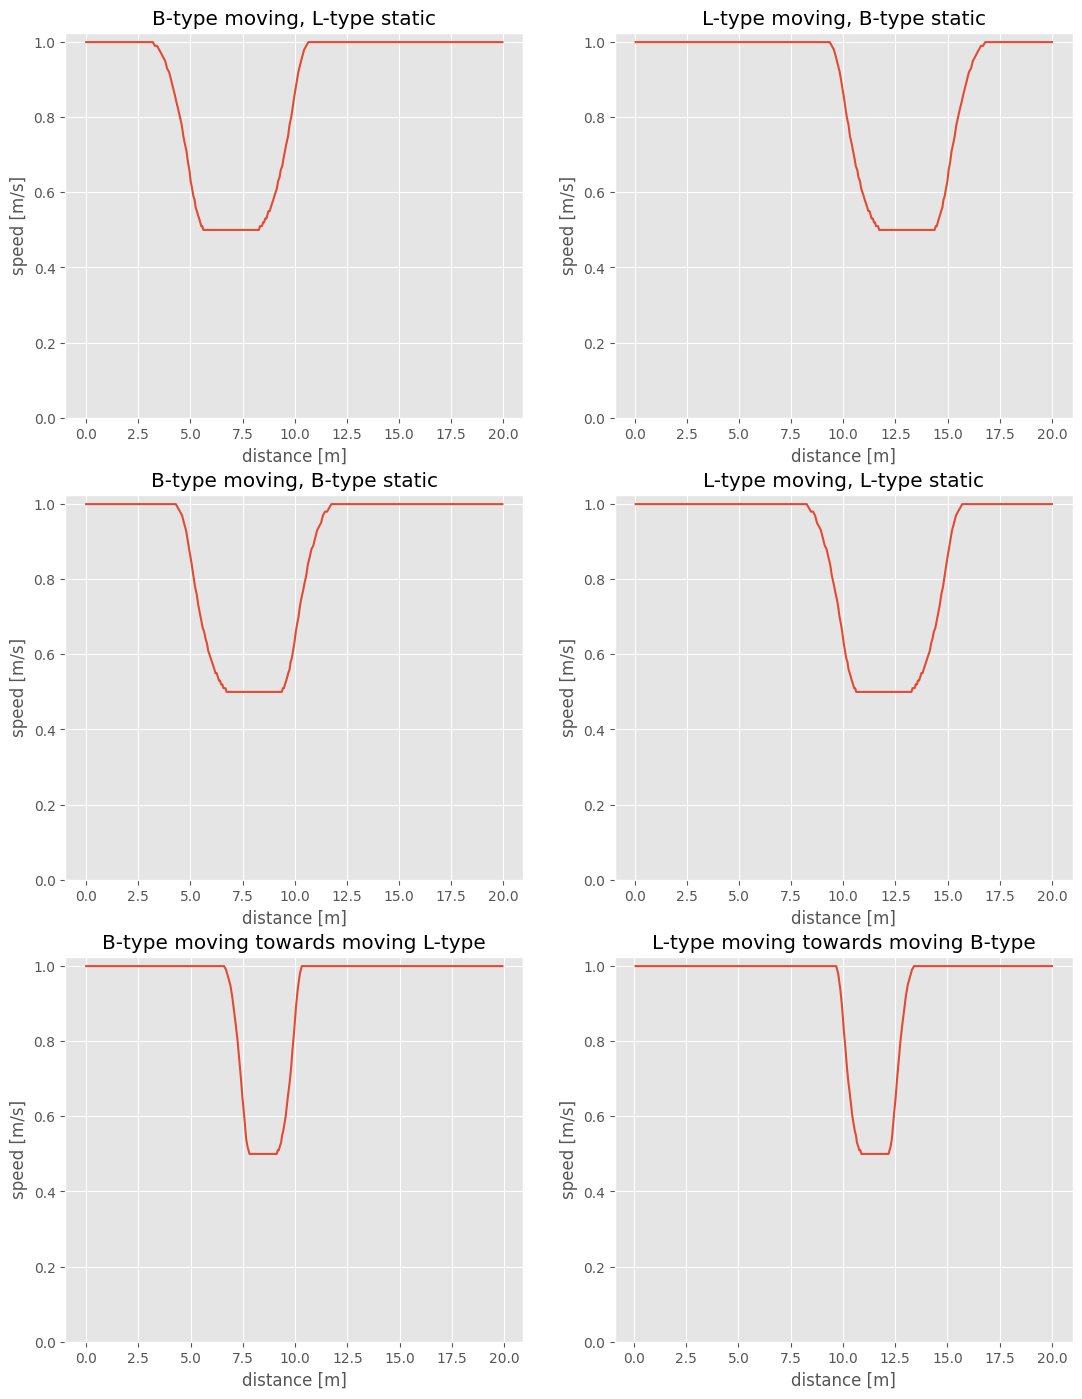

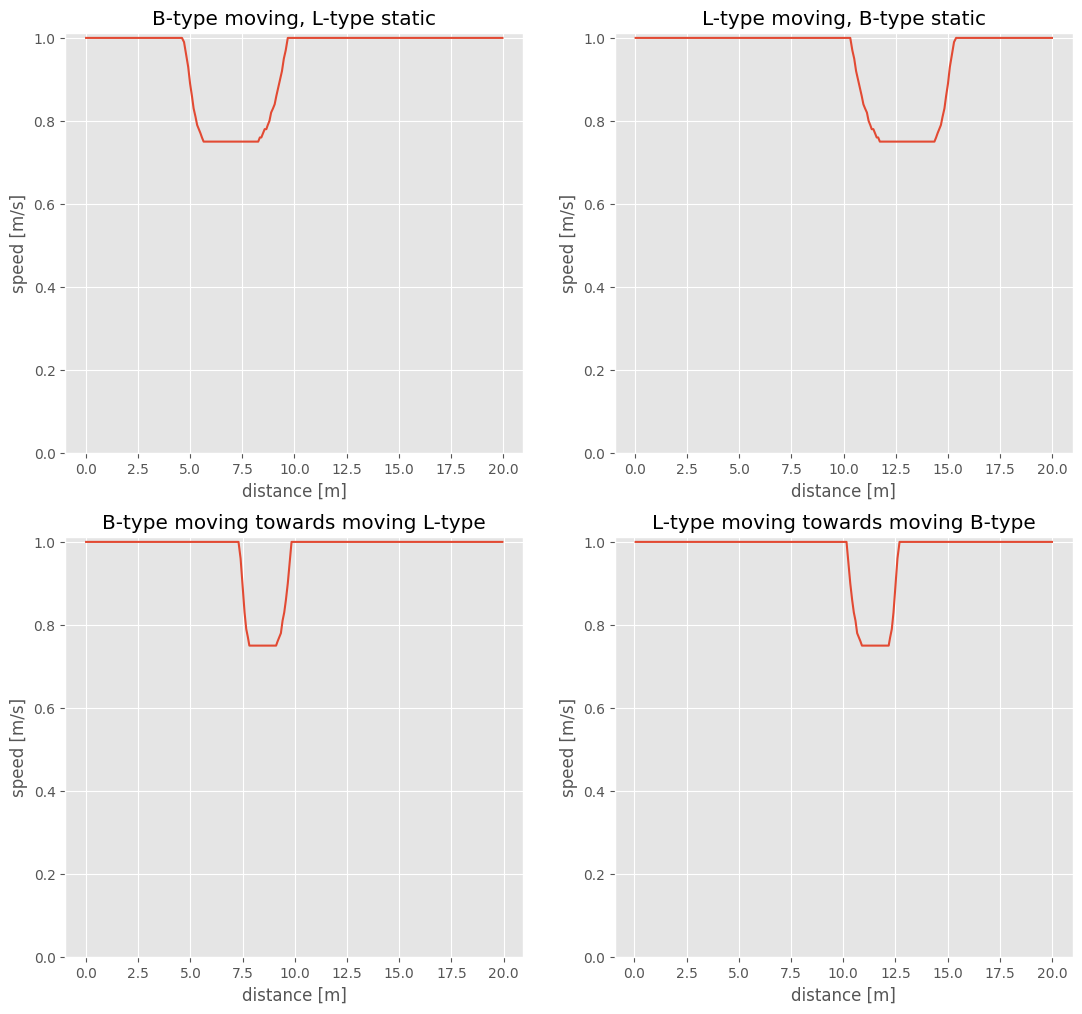

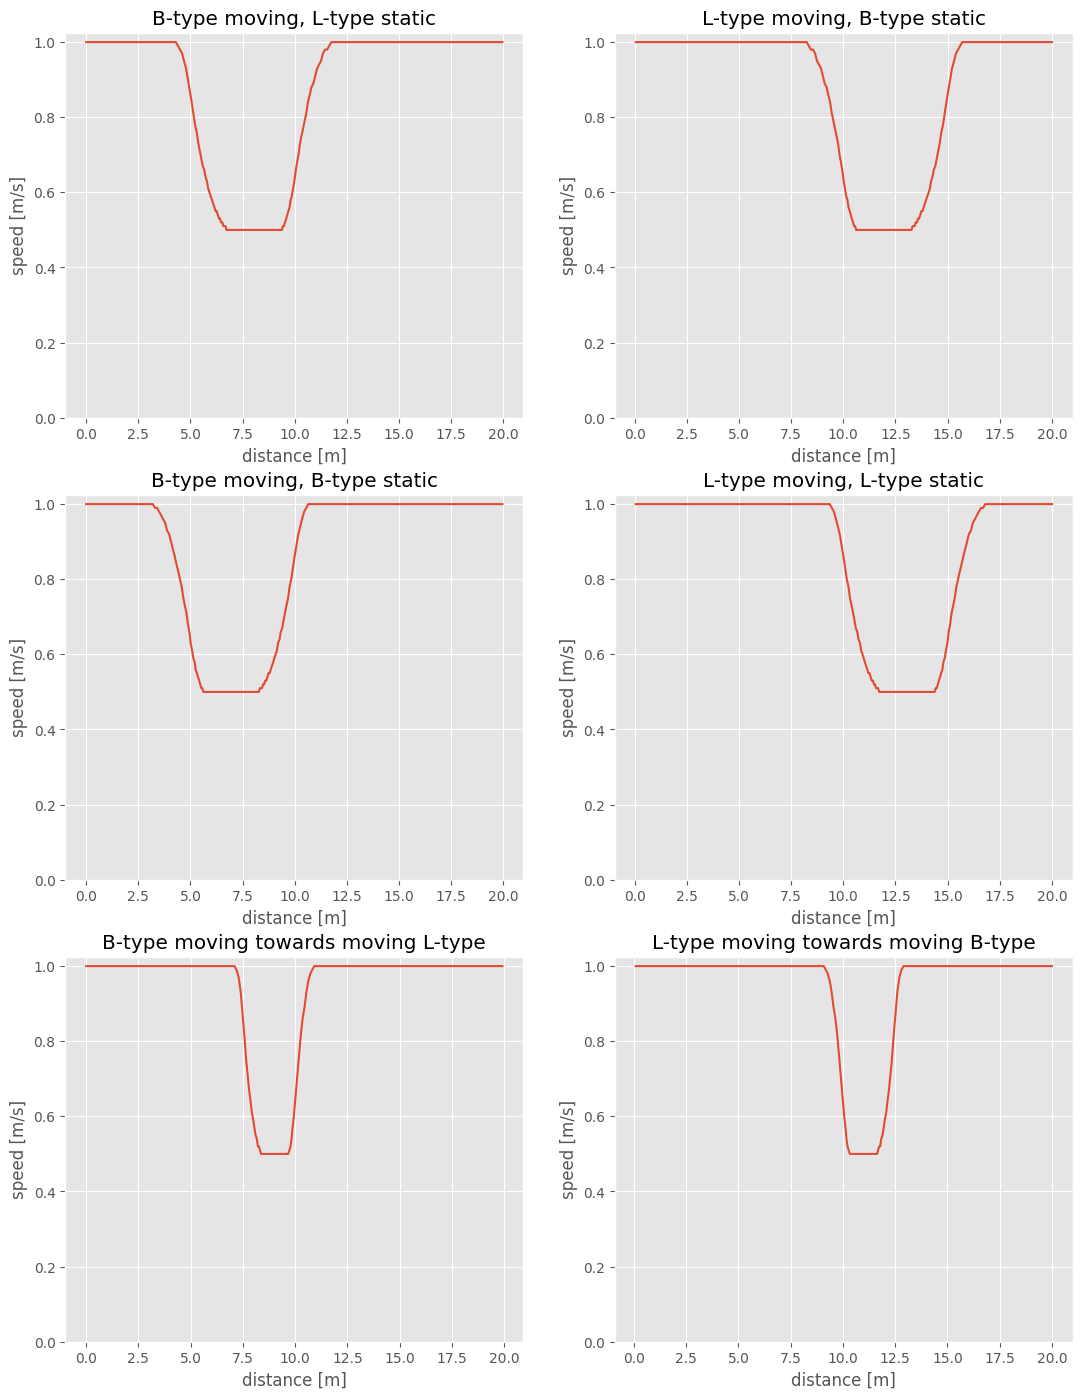

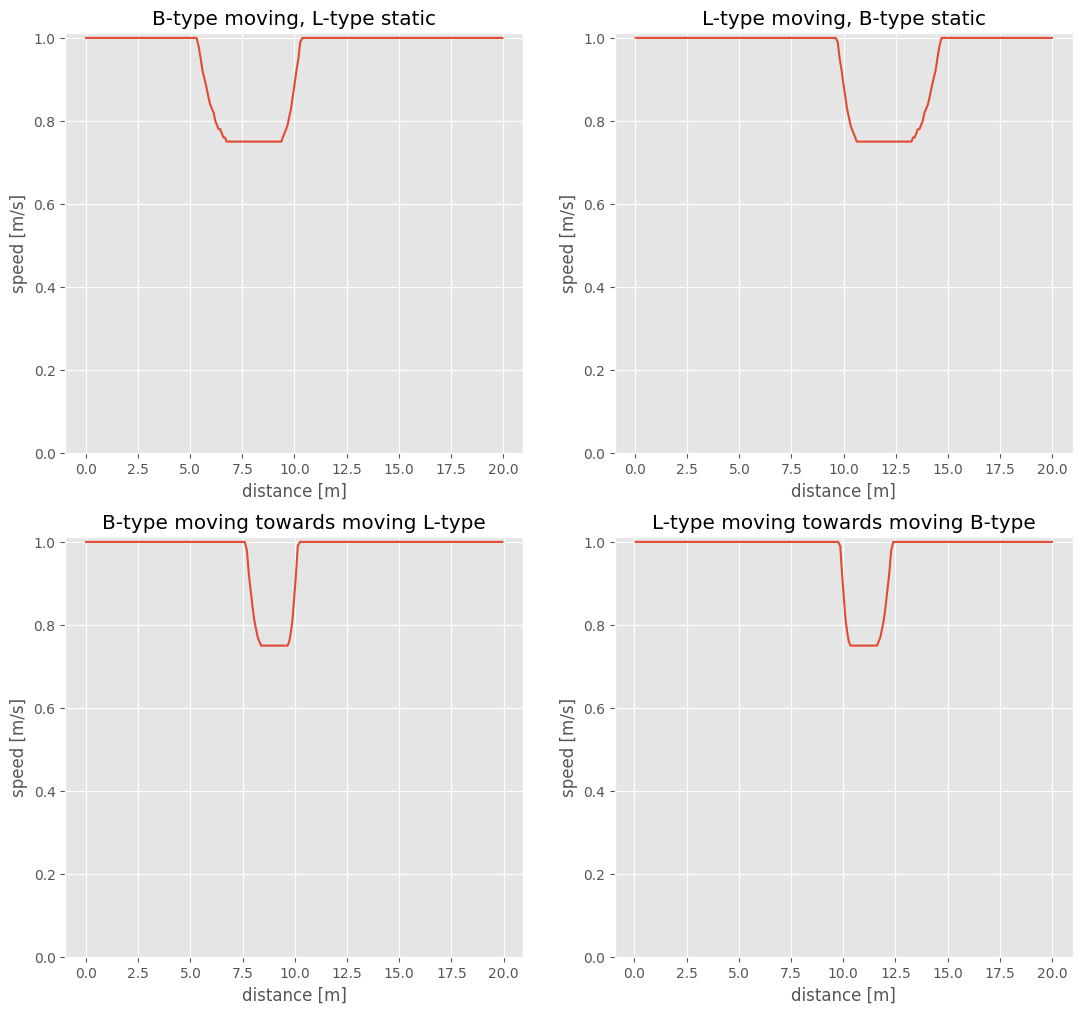

In [7]:
run = False
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '1dyn-1static',
    '1static-1dyn',
    '1dyn1stat-',
    '-1dyn1stat',
    '1dyn-1dyn',
    '1dyn-1static+', 
    '1static-1dyn+', 
    '1dyn-1dyn+', 
    ]
kernels = [
    "diraq",
    "triang1",
    "triang2",
    # "free"
]
data = {}
for kername in kernels:
    data[kername] = []
    if run:
        process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
        process.wait()
    for param in params:
        filename = log_dir + param + '/0'

        if param in ['-1dyn1stat', '1dyn1stat-']:
            data[kername].append((read11_(f'{filename}/{kername}')))
            # plot1_1(f'{filename}/{kername}', * read11_(f'{filename}/{kername}'))
        else:
            data[kername].append((read1_1(f'{filename}/{kername}')))
            # plot1_1(f'{filename}/{kername}', * read1_1(f'{filename}/{kername}'))
    
    plot_all(data, kername)        
    plot_all_(data, kername)        

In [21]:
def plot_macro_(d_cnt: dict, d_velo: dict, ker: str, dist: float = 300, velo: float = 1.2, log: bool = False, param_types: list = [""]):
    fig, ax = plt.subplots(1, 3, figsize=(22, 8))
    fig.suptitle(f"Development of Average Pedestrian Count for {ker.capitalize()} Kernel", size=20)
    
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i].grid(True)
        ax[i].boxplot(list(data_cnt.values()), positions=lams)
        ax[i].set_xlabel('lambda')
        ax[i].set_ylabel('ped count')
        ax[i].set_title(f'{par.capitalize()} Velocities')

        ax[i].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
        ax[i].set_xticklabels(list(str(x) for x in data_cnt.keys()))
        ax[i].set_xticks(lams)

        if log:
            ax[i].set_yscale('log')
        else:
            ax[i].set_ylim(0, 2200)
        
        ax[i].plot(lams, [4 * l * dist / velo for l in lams], marker='', linestyle='--', color='g', label='without interaction')
        ax[i].plot(lams, [np.median(x) for x in data_cnt.values()], marker='', linestyle='--', color='r', label='without interaction')
        
    plt.savefig(f'macro-count-{ker}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=(22, 8))
    fig.suptitle(f"Development of Average Velocity for {ker.capitalize()} Kernel", size=20)
    
    for i, par in enumerate(param_types):
        data_cnt = d_cnt[par]
        data_velo = d_velo[par]

        lams = list(float(x) for x in data_cnt.keys())

        ax[i].grid(True)
        ax[i].boxplot(list(data_velo.values()), positions=lams)
        ax[i].set_xlabel('lambda')
        ax[i].set_ylabel('speed [m/s]')
        ax[i].set_title(f'{par.capitalize()} Velocities')
        ax[i].set_xticklabels(list(str(x) for x in data_velo.keys()))

        ax[i].set_xlim(min(lams) - min(lams), max(lams) + min(lams))
        ax[i].set_xticklabels(list(data_velo.keys()))
        ax[i].set_xticks(lams)

        ax[i].set_ylim(0, max(max(x) for x in data_velo.values()) + 0.3)
        ax[i].axhline(velo, color='g', linestyle='--', label='without interaction')
        ax[i].plot(lams, [np.median(x) for x in data_velo.values()], marker='', linestyle='--', color='r', label='without interaction')

    plt.savefig(f'macro-speed-{ker}.pdf', dpi=300, bbox_inches='tight')
    plt.show

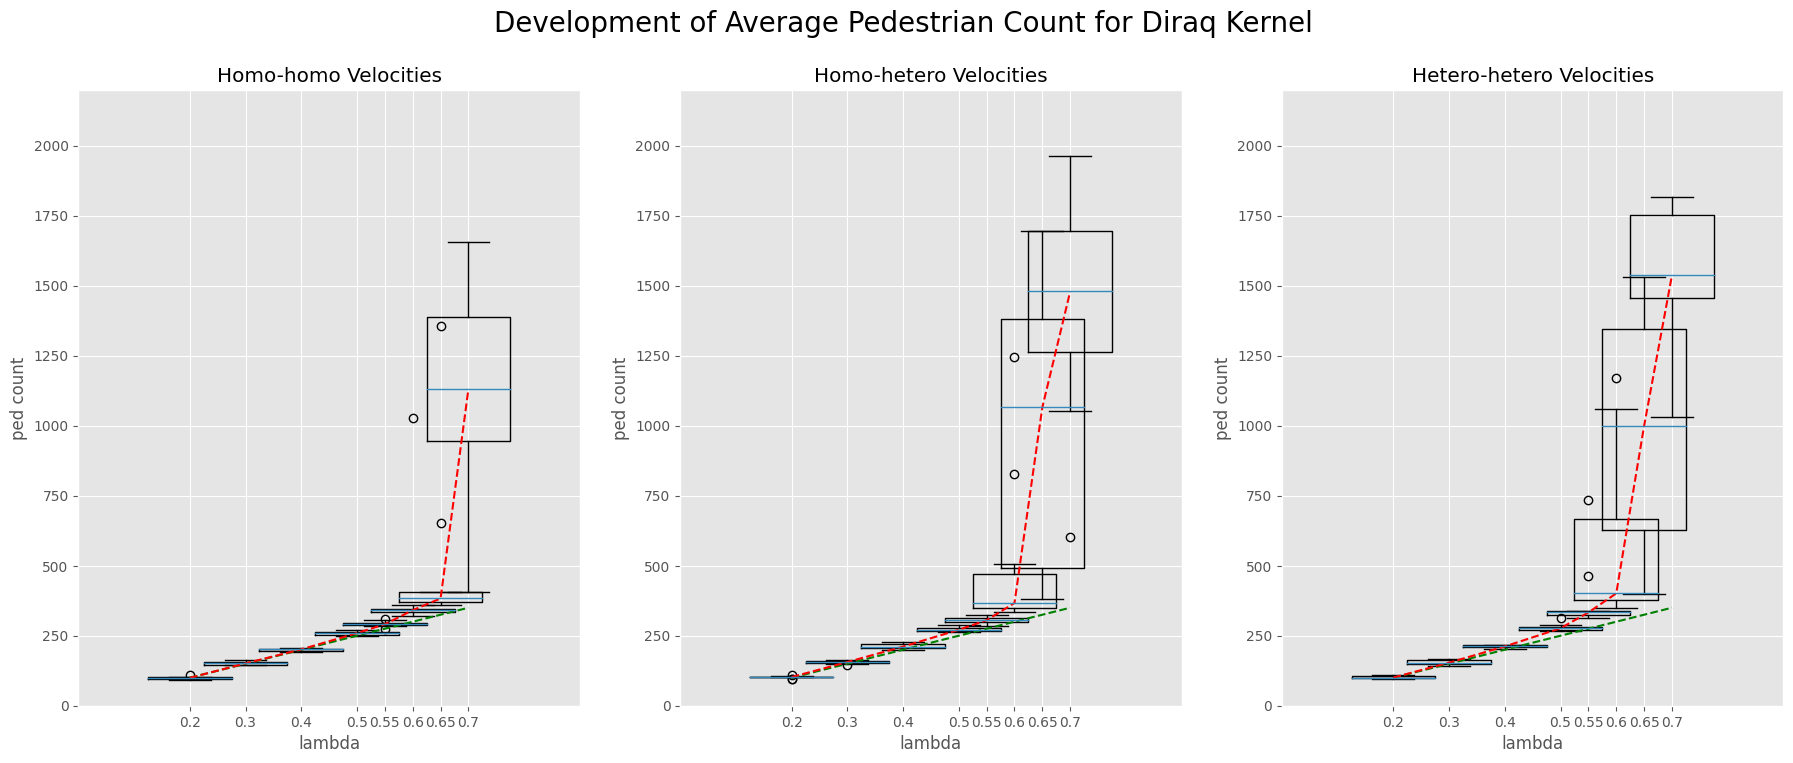

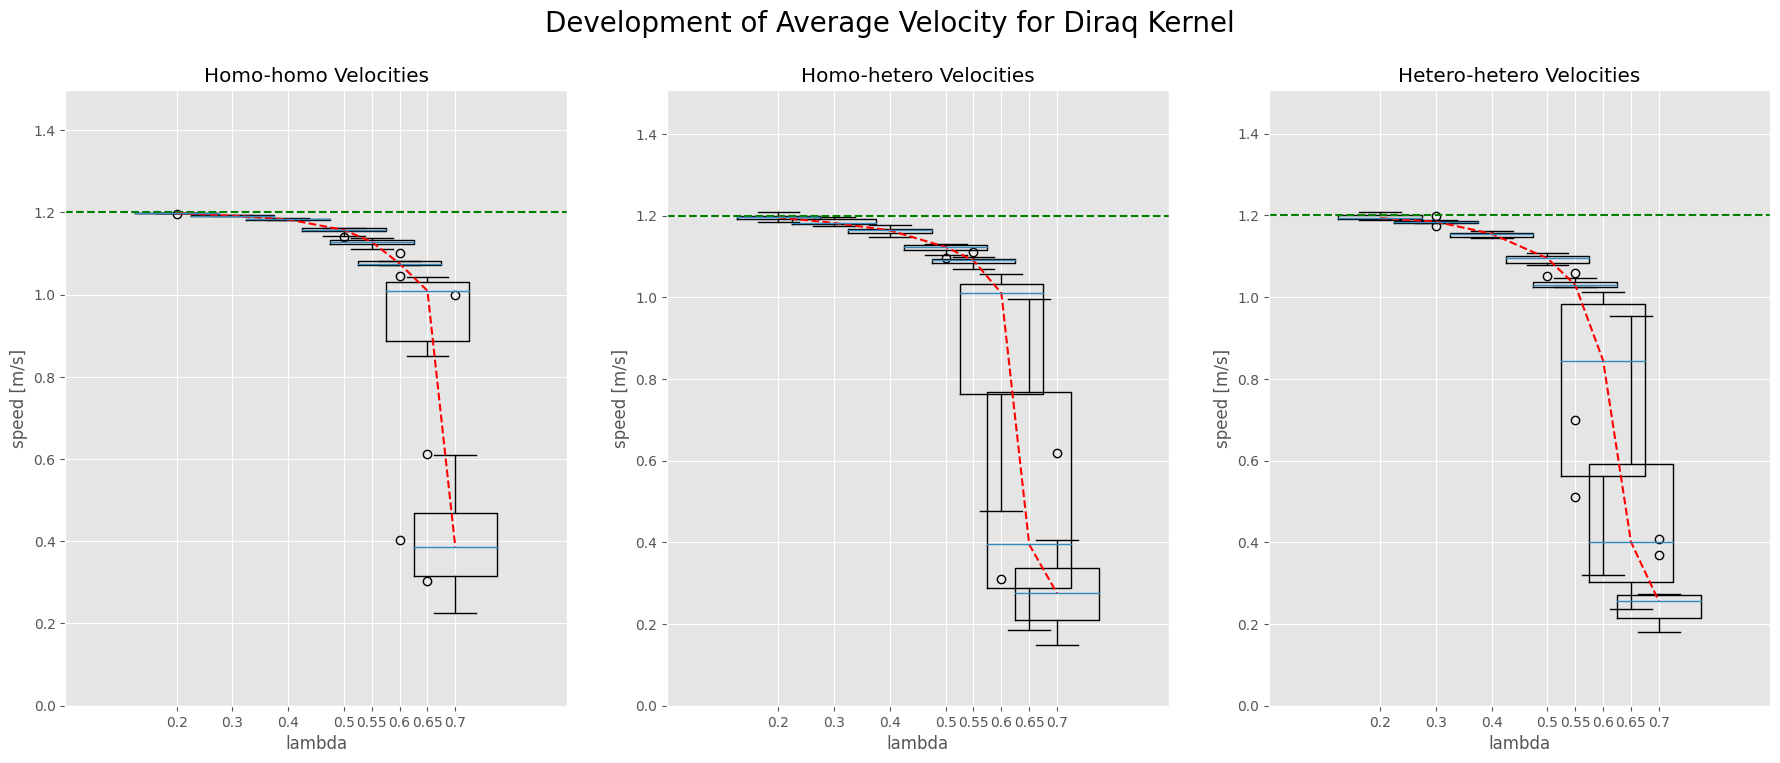

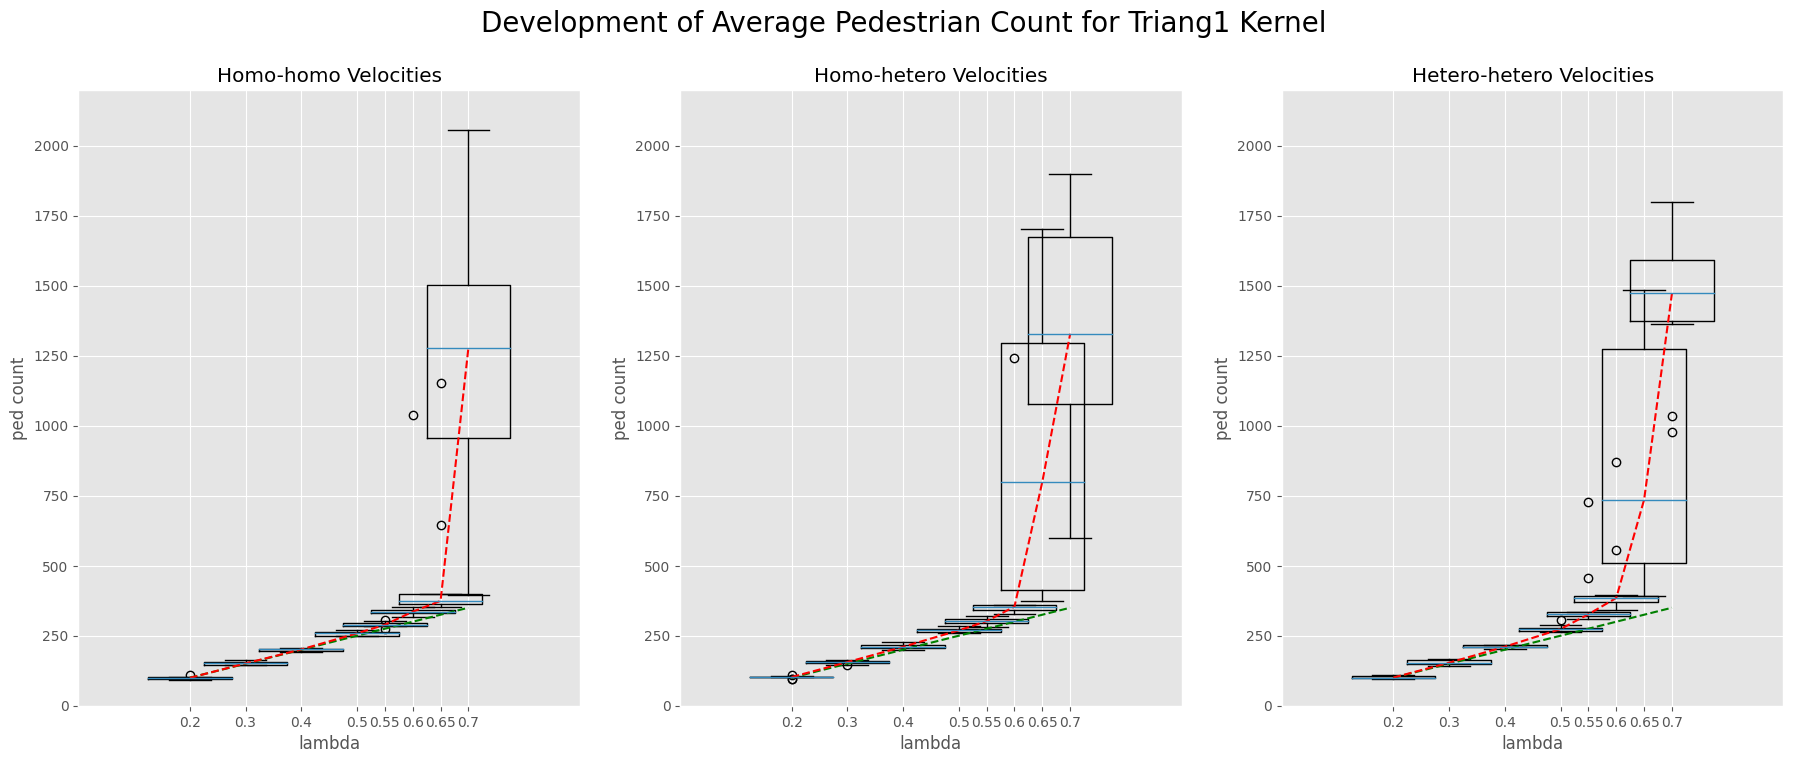

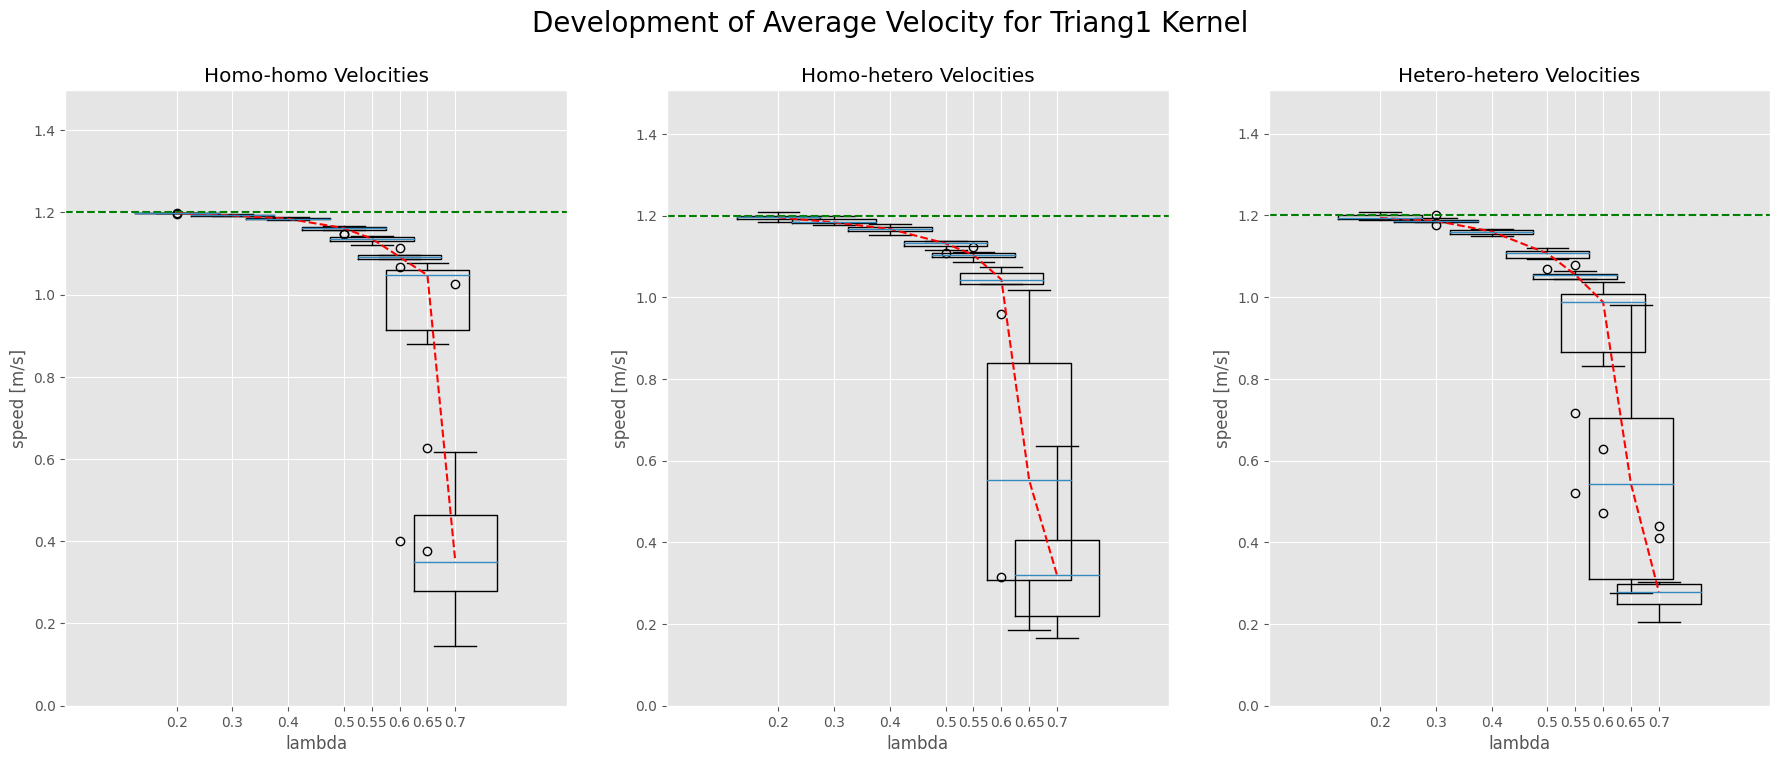

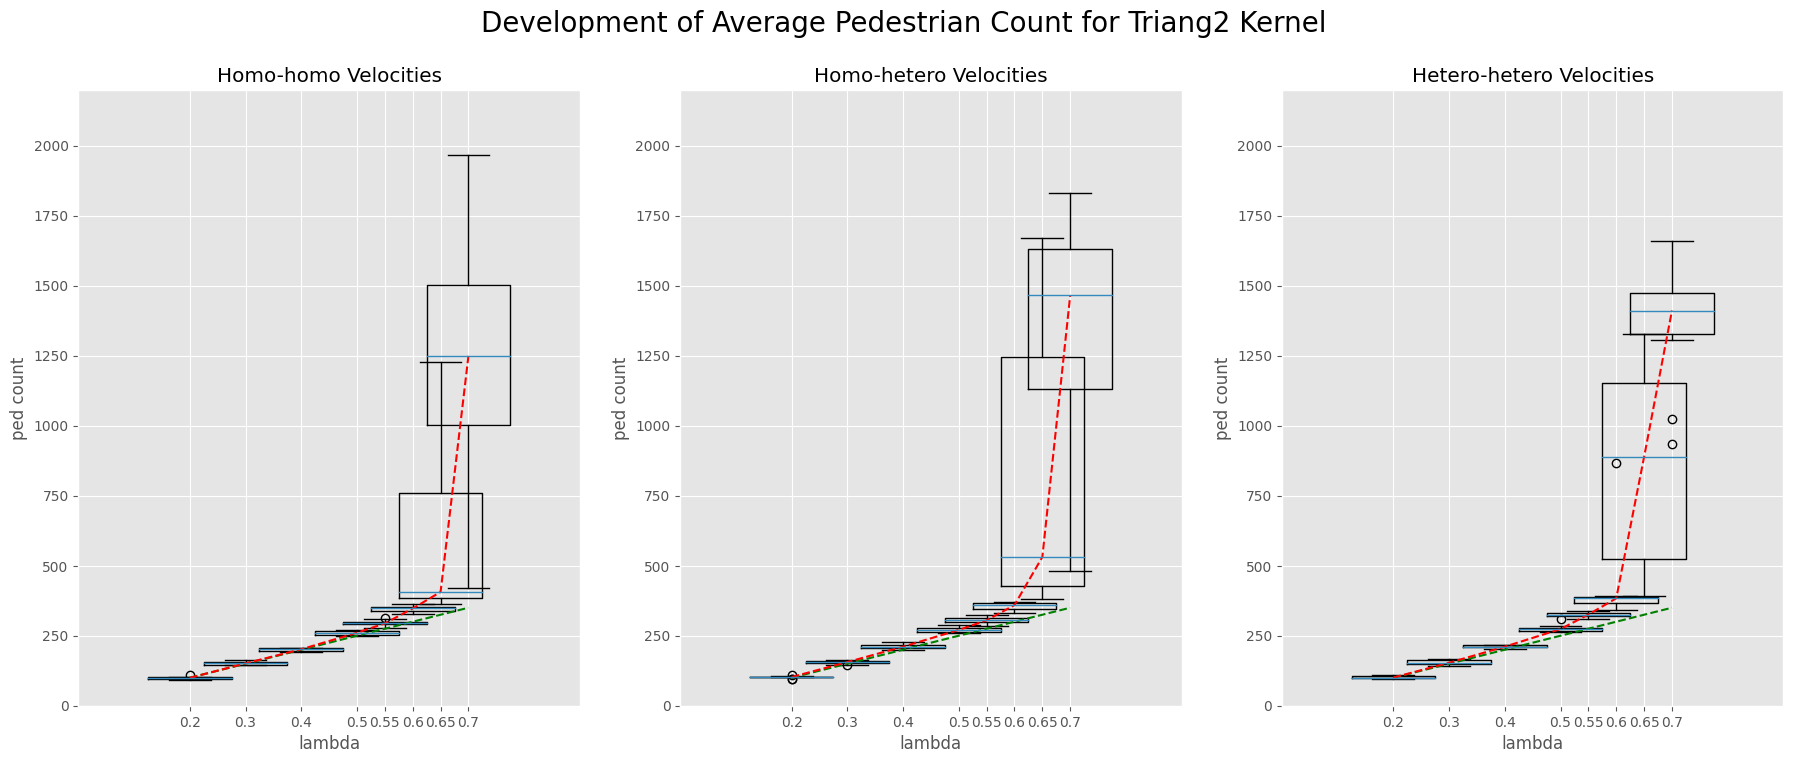

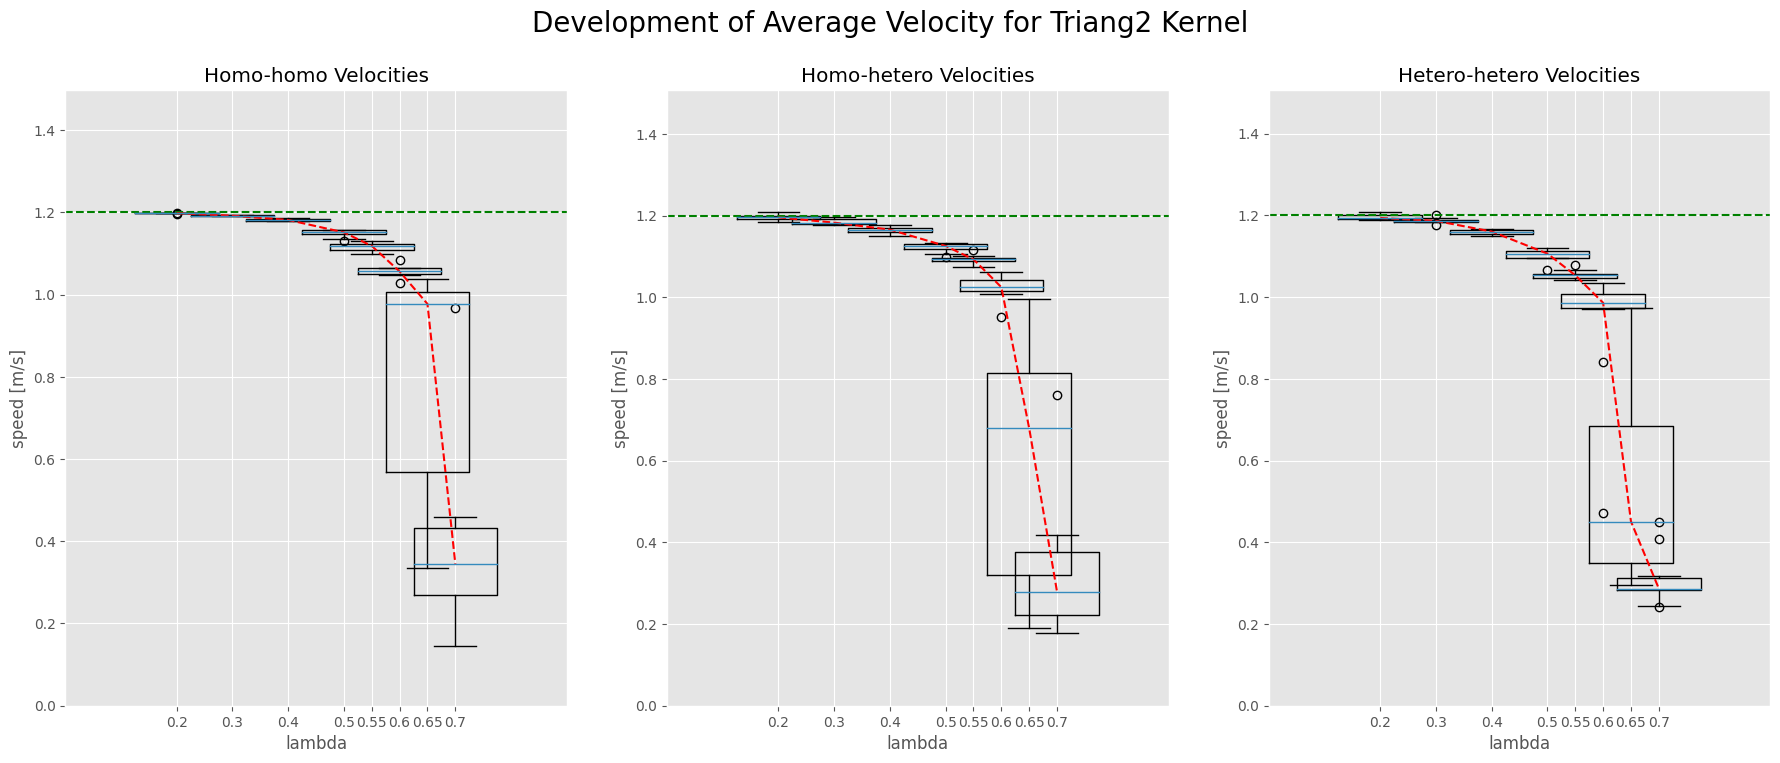

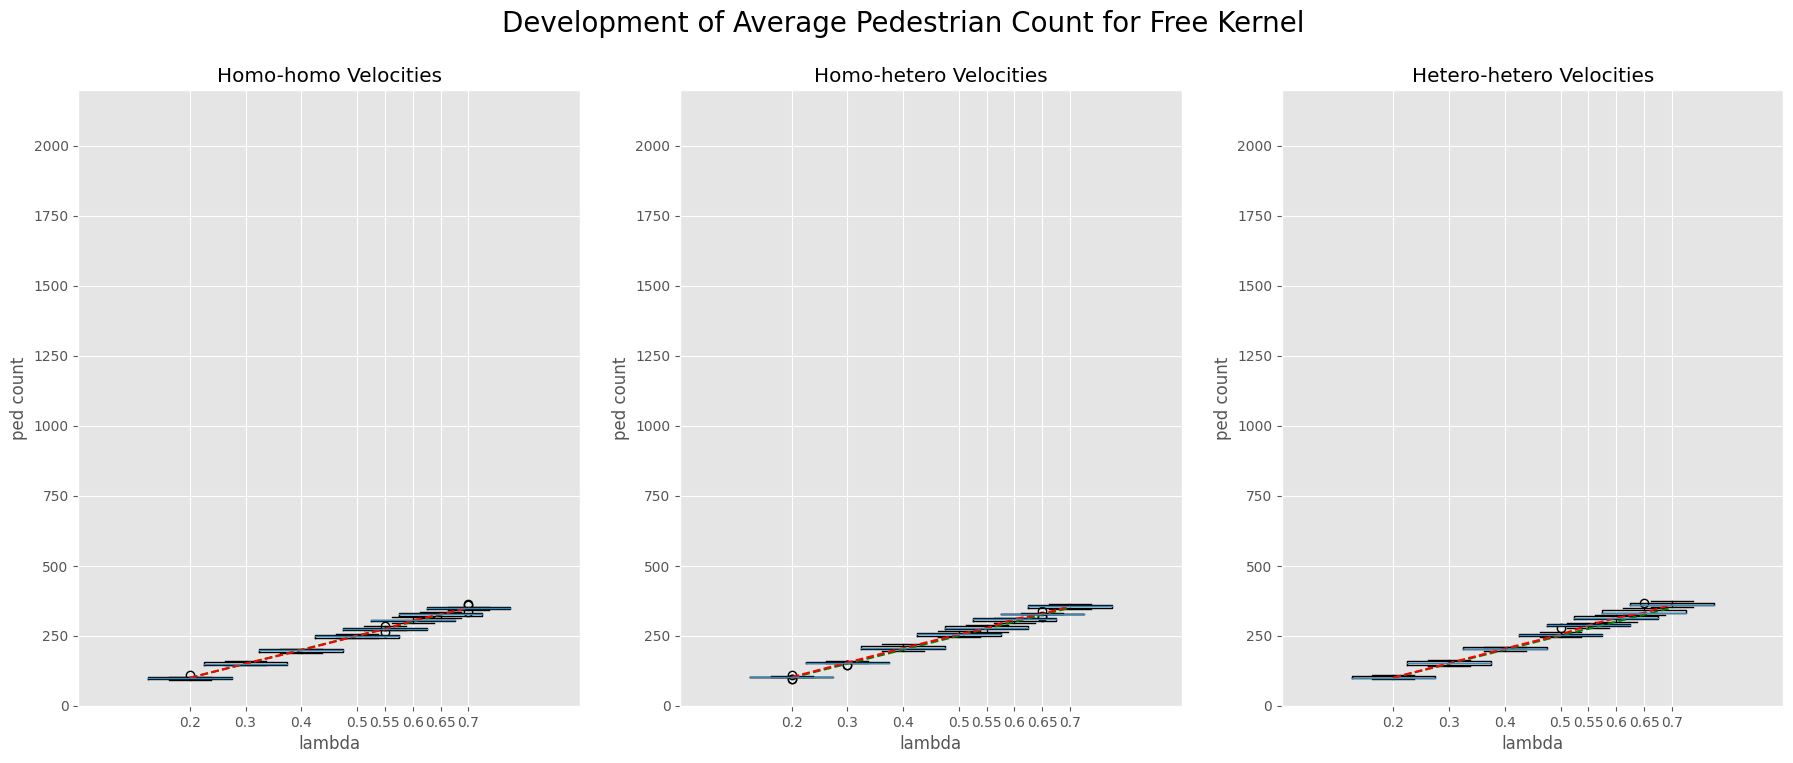

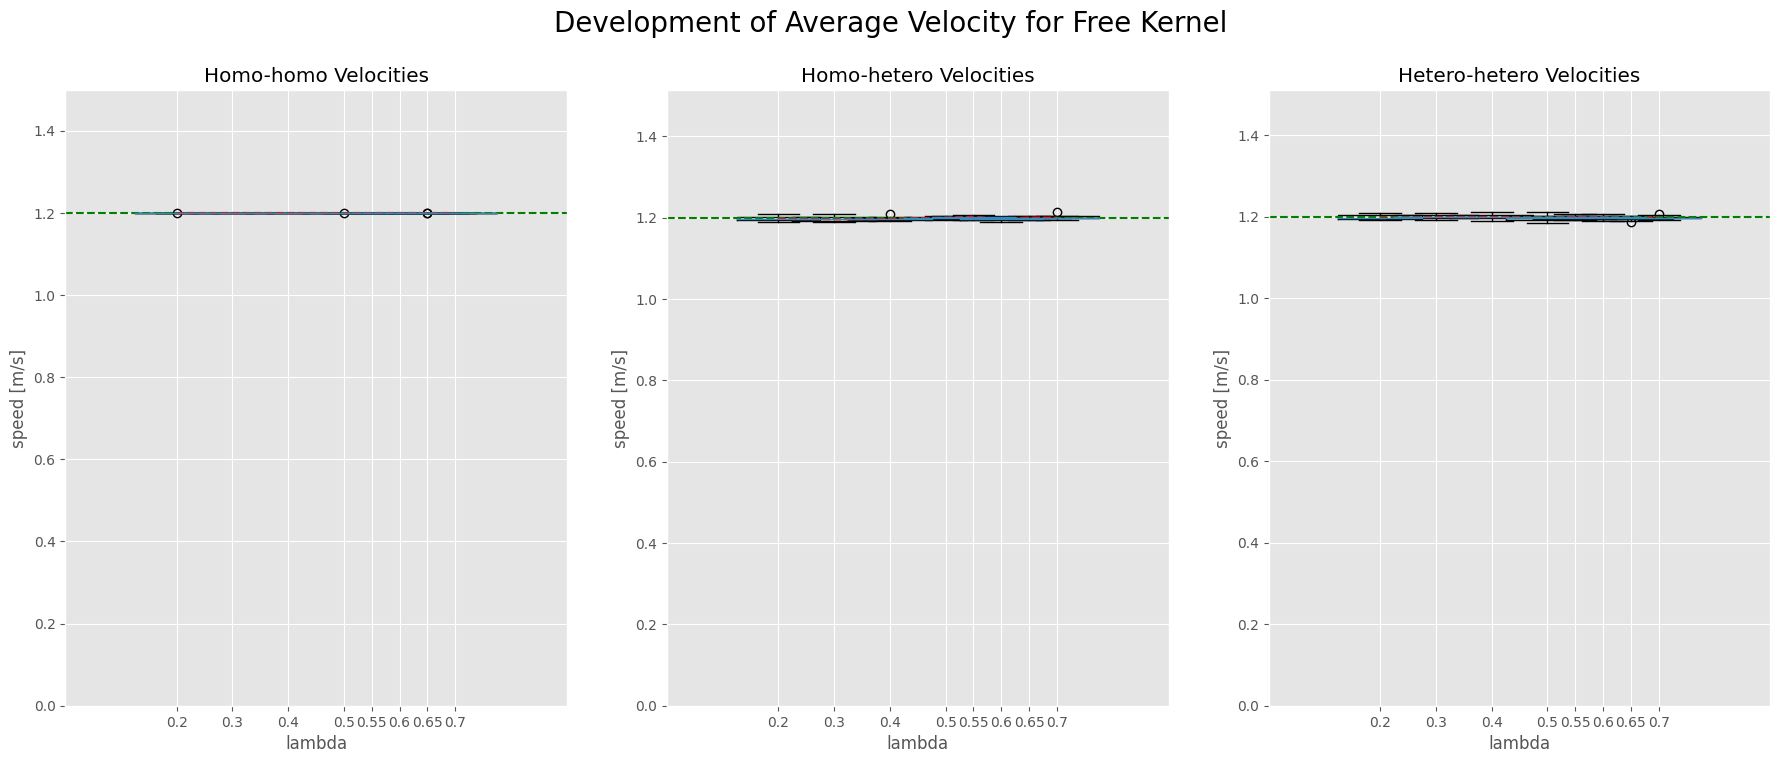

In [22]:
sim_file = '../simulation'
param_dir = '../params/'
file_type_cnt = '.transportB'
file_type_velo = '.transportB_end'
iter_cnt = 10
timestep = 0.1
run = False
kernels = [
    "diraq"
    ,"triang1"
    ,"triang2"
    ,"free"
]
param_types = ["homo-homo", "homo-hetero", "hetero-hetero"]

for kername in kernels[:]:
    arr = []
    # keys are param_types
    data_cnt = dict()
    data_velo = dict()
    for param_type in param_types[:]:
        log_dir = f'../log/{param_type}/'
        
        data_cnt[param_type] = dict()
        data_velo[param_type] = dict()

        for param in [f'{param_type}{i}' for i in range(1, 9)]:
            dist, lam, velo = extract_params(param_dir + param)
            data_cnt[param_type][lam] = list()
            data_velo[param_type][lam] = list()
            for it in range(iter_cnt):
                dir = log_dir + param + f'/{str(it)}/'
                file_cnt = f'{dir}{kername}{file_type_cnt}'
                file_velo = f'{dir}{kername}{file_type_velo}'

                static_start, static_end = read_static(file_velo)

                data_cnt[param_type][lam].append(read_cnt(file_cnt, static_start, static_end, timestep))
                data_velo[param_type][lam].append(read_velo(file_velo, dist, static_start, static_end, timestep))

    plot_macro_(data_cnt, data_velo, kername, dist, velo, False, param_types)
                

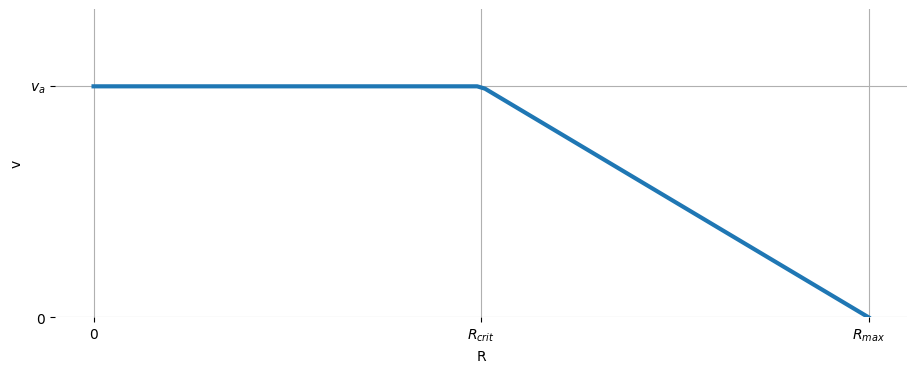

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the fundamental diagram
def v_rho_transport(ρ, v_opt, ρ_crit, ρ_max):
    v = np.zeros_like(ρ)  # Initialize velocity array with zeros
    v[ρ < ρ_crit] = v_opt  # Set velocity to v_opt for ρ < ρ_crit
    v[(ρ_crit < ρ) & (ρ < ρ_max)] = v_opt * (1 - (ρ[(ρ_crit < ρ) & (ρ < ρ_max)] - ρ_crit) / (ρ_max - ρ_crit))  # Set velocity to v_opt * (1 - (ρ - ρ_crit) / (ρ_max - ρ_crit)) for ρ_crit < ρ < ρ_max
    return v

# Define parameters
v_opt = 30  # Optimal velocity
ρ_crit = 50  # Critical density
ρ_max = 100  # Maximum density

# Generate density range
ρ_range = np.linspace(0, ρ_max, 100)

# Calculate velocity values using the defined function
v_transport = v_rho_transport(ρ_range, v_opt, ρ_crit, ρ_max)

# Plotting
plt.figure(figsize=(11, 4))

# Plot v(ρ) using the defined function
plt.plot(ρ_range, v_transport, linewidth=3)
plt.xlabel('R')
plt.ylabel('v')
plt.grid(True)

plt.xticks([0, 50, 100], ["0", '$R_{crit}$', '$R_{max}$'])
plt.yticks([0, 30], ["0", '$v_{a}$'])
plt.ylim(0, 40)

# Remove the rectangular frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Show plot
plt.savefig("fd-transport.pdf")
plt.show()

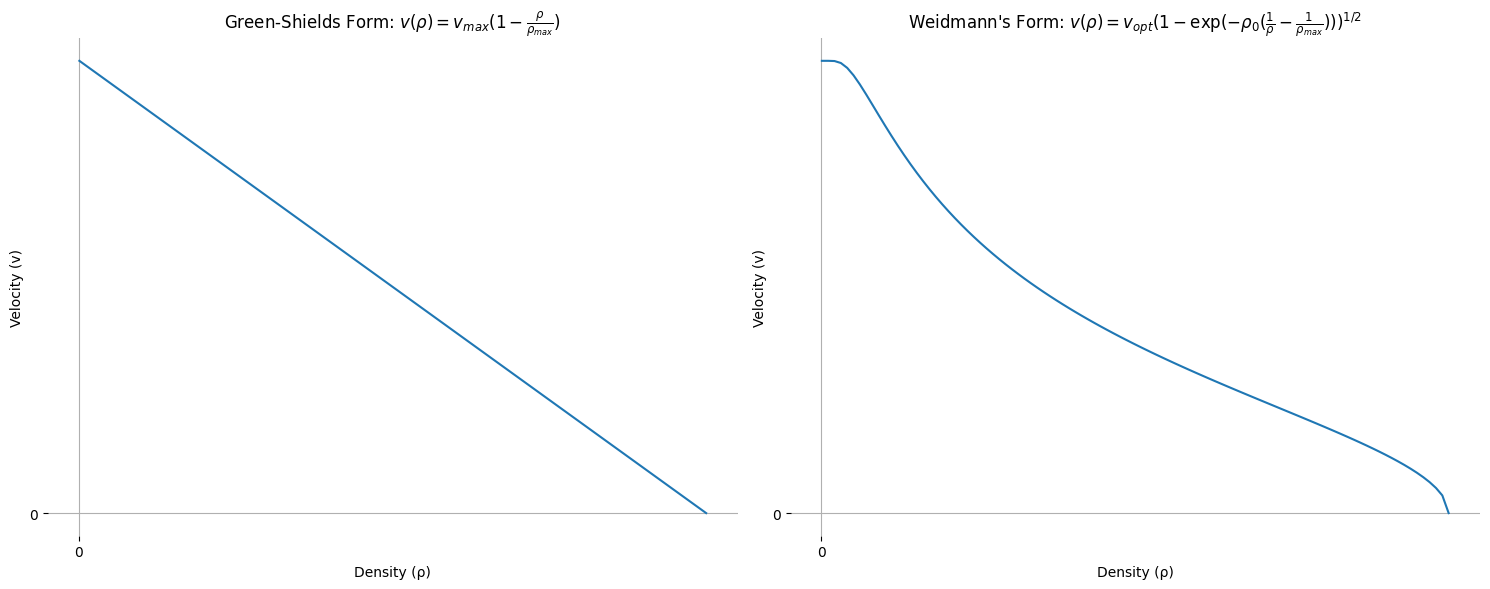

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Green-Shields function for velocity-density relationship
def v_rho_greenshields(ρ, v_max, ρ_max):
    return v_max * (1 - ρ / ρ_max)

# Define the Weidmann's function for velocity-density relationship
def v_rho_weidmann(ρ, v_opt, ρ_0, ρ_max):
    return v_opt * (1 - np.exp(-ρ_0 * (1/ρ - 1/ρ_max)))**(1/2)

# Define parameters for Green-Shields
v_max_gs = 30  # Maximum velocity for Green-Shields
ρ_max_gs = 100  # Maximum density for Green-Shields

# Define parameters for Weidmann's
v_opt_w = 30  # Optimal velocity for Weidmann's
ρ_max_w = 100  # Maximum density for Weidmann's
ρ_0_w = 15  # Exponential decay parameter for Weidmann's

# Generate density range for both models
ρ_range = np.linspace(0.1, max(ρ_max_gs, ρ_max_w), 100)  # Start from 0.1 to avoid division by zero

# Calculate velocity values for Green-Shields
v_greenshields = v_rho_greenshields(ρ_range, v_max_gs, ρ_max_gs)

# Calculate velocity values for Weidmann's
v_weidmann = v_rho_weidmann(ρ_range, v_opt_w, ρ_0_w, ρ_max_w)

# Plotting
plt.figure(figsize=(15, 6))

# Plot v(ρ) using Green-Shields function
plt.subplot(1, 2, 1, frameon=False)
plt.plot(ρ_range, v_greenshields)
plt.xlabel('Density (ρ)')
plt.ylabel('Velocity (v)')
plt.title('Green-Shields Form: $v(ρ) = v_{max} (1 - \\frac{ρ}{ρ_{max}})$')
plt.grid(True)
plt.xticks([0])
plt.yticks([0])

# Plot v(ρ) using Weidmann's function
plt.subplot(1, 2, 2, frameon=False)
plt.plot(ρ_range, v_weidmann)
plt.xlabel('Density (ρ)')
plt.ylabel('Velocity (v)')
plt.title('Weidmann\'s Form: $v(ρ) = v_{opt} (1 - \exp(-ρ_0 (\\frac{1}{ρ} - \\frac{1}{ρ_{max}})))^{1/2}$')
plt.grid(True)
plt.xticks([0])
plt.yticks([0])

# Show plot
plt.tight_layout()
plt.savefig("fd-examples.pdf")
plt.show()


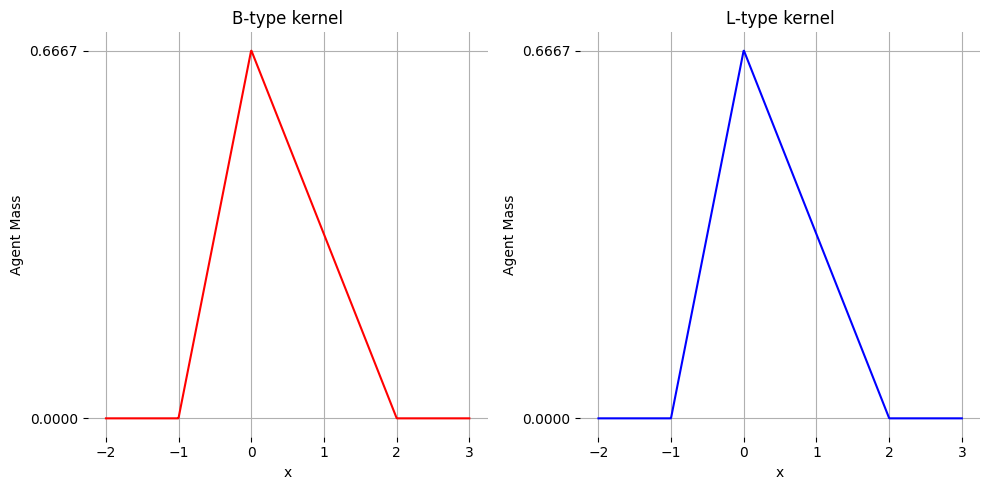

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def asymmetric_triangular_kernel(x, c1, c2):
    left_mask = np.logical_and(x >= -c1, x < 0)
    right_mask = np.logical_and(x >= 0, x <= c2)
    h = 2 / (c1 + c2)
    
    tmp1 = h * (abs(x[left_mask])) / c1
    tmp2 = h * (abs(x[right_mask])) / c2
    
    kernel = np.zeros_like(x)
    kernel[left_mask] = tmp1[::-1]
    kernel[right_mask] = tmp2[::-1]
    
    return kernel

# Generate x values
x = np.linspace(-2, 3, 1000)

# Define parameters for the asymmetric triangular kernel
c1 = 1.0  # Left slope coefficient
c2 = 2.0  # Right slope coefficient

# Calculate the kernel values
kernel = asymmetric_triangular_kernel(x, c1, c2)
kernel2 = asymmetric_triangular_kernel(x, c2, c1)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot first kernel in the first subplot
axs[0].plot(x, kernel, label='Kernel 1', color='red')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Agent Mass')
axs[0].set_title('B-type kernel')
axs[0].grid(True)
axs[0].set_yticks([0, 2 / (c1 + c2)])

# Hide spines for the first subplot
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Plot second kernel in the second subplot
axs[1].plot(x, kernel, label='Kernel 2', color='blue')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Agent Mass')
axs[1].set_title('L-type kernel')
axs[1].grid(True)
axs[1].set_yticks([0, 2 / (c1 + c2)])

# Hide spines for the second subplot
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Adjust layout
plt.tight_layout()

plt.savefig("kernels.pdf")
# Show plot
plt.show()


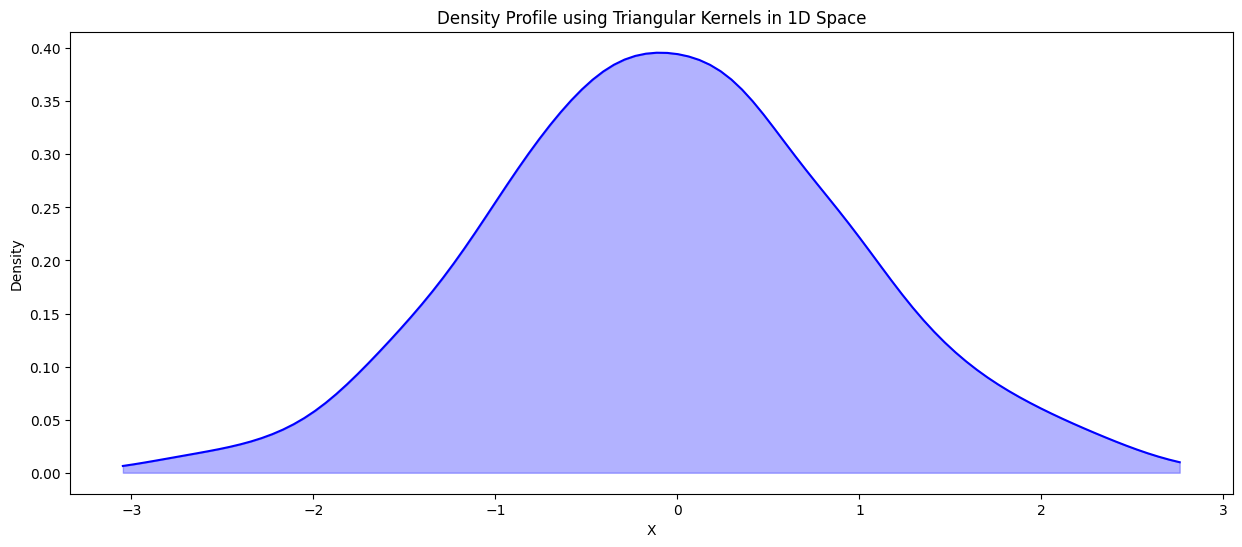

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generating random data
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

# Create a kernel density estimate
kde = gaussian_kde(data, bw_method='silverman')

# Define grid for density estimation
xmin, xmax = min(data), max(data)
x_grid = np.linspace(xmin, xmax, 100)
Z = kde(x_grid)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(x_grid, Z, color='blue')
plt.fill_between(x_grid, Z, color='blue', alpha=0.3)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Profile using Triangular Kernels in 1D Space')
plt.show()
